In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.feature_selection import mutual_info_classif as MIC
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import confusion_matrix, roc_curve, auc

warnings.filterwarnings('ignore')

In [2]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
data_train.head()

,user_id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1374,58,No,Travel_Rarely,605,Sales,21,3,Life Sciences,1,...,3,80,1,29,2,2,1,0,0,0
1,1092,45,No,Travel_Rarely,950,Research & Development,28,3,Technical Degree,1,...,4,80,1,8,3,3,5,4,0,3
2,768,40,No,Travel_Rarely,300,Sales,26,3,Marketing,1,...,2,80,1,8,3,2,7,7,7,5
3,569,36,No,Non-Travel,1434,Sales,8,4,Life Sciences,1,...,2,80,0,10,1,3,10,7,0,9
4,911,25,Yes,Travel_Frequently,599,Sales,24,1,Life Sciences,1,...,4,80,0,1,4,3,1,0,1,0


2024-05-06 09:36:46 données_train = pd.read_csv('train.csv')
données_test = pd.read_csv('test.csv')
data_train.head()

In [3]:
data_train.columns

Index(['user_id', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   user_id                   1176 non-null   int64 
 1   Age                       1176 non-null   int64 
 2   Attrition                 1176 non-null   object
 3   BusinessTravel            1176 non-null   object
 4   DailyRate                 1176 non-null   int64 
 5   Department                1176 non-null   object
 6   DistanceFromHome          1176 non-null   int64 
 7   Education                 1176 non-null   int64 
 8   EducationField            1176 non-null   object
 9   EmployeeCount             1176 non-null   int64 
 10  EmployeeNumber            1176 non-null   int64 
 11  EnvironmentSatisfaction   1176 non-null   int64 
 12  Gender                    1176 non-null   object
 13  HourlyRate                1176 non-null   int64 
 14  JobInvolvement          

In [5]:
data_train.isnull().sum().sum()

0

In [6]:
data_train.describe()

,user_id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,...,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.00000,1176.000000,1176.000000
mean,736.124150,36.805272,802.033163,9.159864,2.918367,1.0,1026.960034,2.750850,65.130102,2.724490,...,2.714286,80.0,0.805272,11.161565,2.767007,2.764456,6.982143,4.19898,2.160714,4.098639
std,419.336964,9.065549,405.946729,8.137224,1.009809,0.0,594.763609,1.096221,20.294326,0.715027,...,1.080583,0.0,0.865611,7.747576,1.250756,0.713251,6.094338,3.63124,3.208052,3.564190
min,0.000000,18.000000,104.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000
25%,374.750000,30.000000,463.500000,2.000000,2.000000,1.0,498.750000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.00000,0.000000,2.000000
50%,742.500000,36.000000,805.500000,7.000000,3.000000,1.0,1031.000000,3.000000,65.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.00000,1.000000,3.000000
75%,1101.250000,42.250000,1162.000000,14.000000,4.000000,1.0,1555.250000,4.000000,82.250000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.00000,2.250000,7.000000
max,1469.000000,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.00000,15.000000,17.000000


In [7]:
data_test.head()

,user_id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,442,36,Non-Travel,635,Sales,10,4,Medical,1,592,...,4,80,0,10,3,2,10,3,9,7
1,1091,33,Travel_Rarely,575,Research & Development,25,3,Life Sciences,1,1545,...,4,80,0,5,2,3,5,3,0,2
2,981,35,Travel_Frequently,662,Sales,18,4,Marketing,1,1380,...,3,80,1,5,0,2,4,2,3,2
3,785,40,Travel_Rarely,1492,Research & Development,20,4,Technical Degree,1,1092,...,4,80,1,14,6,3,11,10,11,1
4,1332,29,Travel_Frequently,459,Research & Development,24,2,Life Sciences,1,1868,...,2,80,0,1,3,2,1,0,1,0


In [8]:
data_test.isnull().sum().sum()

0

In [9]:
## 判断train test 特征列相同
columns = list(data_train.columns)
columns.remove('Attrition')
columns == list(data_test.columns) 

True

In [10]:
one_value_fea_train = [col for col in data_train.columns if data_train[col].nunique() <= 1]
one_value_fea_test = [col for col in data_test.columns if data_test[col].nunique() <= 1]
print(one_value_fea_test, one_value_fea_train)

['EmployeeCount', 'Over18', 'StandardHours'] ['EmployeeCount', 'Over18', 'StandardHours']


In [11]:
data_test[['EmployeeCount', 'Over18', 'StandardHours']].nunique()

EmployeeCount    1
Over18           1
StandardHours    1
dtype: int64

In [12]:
data_train.drop(columns=one_value_fea_train,inplace=True)

data_test.drop(columns=one_value_fea_test,inplace=True)

In [13]:
#删除user_id列
data_train.drop(columns='user_id',inplace=True)

data_test.drop(columns='user_id',inplace=True)

In [14]:
numerical_fea = list(data_train.select_dtypes(exclude=['object']).columns)
category_fea = list(filter(lambda x: x not in numerical_fea,list(data_train.columns)))
print('numerical_fea: ',numerical_fea)
print()
print('*'*100)
print()
print('category_fea:',category_fea)

numerical_fea:  ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

****************************************************************************************************

category_fea: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


In [15]:
# 划分数值型变量中的连续变量和离散型变量
def get_numerical_serial_fea(data,feas):
    numerical_serial_fea = []
    numerical_noserial_fea = []
    for fea in feas:
        temp = data[fea].nunique()
        if temp <= 10:
            numerical_noserial_fea.append(fea)
            continue
        numerical_serial_fea.append(fea)
    return numerical_serial_fea,numerical_noserial_fea
numerical_serial_fea,numerical_noserial_fea = get_numerical_serial_fea(data_train,numerical_fea)

In [16]:
print("numerical_serial_fea: ",numerical_serial_fea)
print()
print('*'*100)
print()
print("numerical_noserial_fea: ",numerical_noserial_fea)

numerical_serial_fea:  ['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeNumber', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

****************************************************************************************************

numerical_noserial_fea:  ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance']


In [17]:
for i in numerical_noserial_fea:
    print( data_train[i].value_counts())

Education
3    468
4    315
2    227
1    129
5     37
Name: count, dtype: int64
EnvironmentSatisfaction
4    373
3    360
1    223
2    220
Name: count, dtype: int64
JobInvolvement
3    687
2    306
4    116
1     67
Name: count, dtype: int64
JobLevel
1    442
2    420
3    174
4     87
5     53
Name: count, dtype: int64
JobSatisfaction
4    371
3    348
2    229
1    228
Name: count, dtype: int64
NumCompaniesWorked
1    417
0    163
3    125
4    114
2    107
7     60
6     58
5     51
9     46
8     35
Name: count, dtype: int64
PerformanceRating
3    999
4    177
Name: count, dtype: int64
RelationshipSatisfaction
3    365
4    347
2    245
1    219
Name: count, dtype: int64
StockOptionLevel
0    504
1    470
2    129
3     73
Name: count, dtype: int64
TrainingTimesLastYear
2    455
3    389
5     99
4     97
1     54
0     42
6     40
Name: count, dtype: int64
WorkLifeBalance
3    714
2    269
4    126
1     67
Name: count, dtype: int64


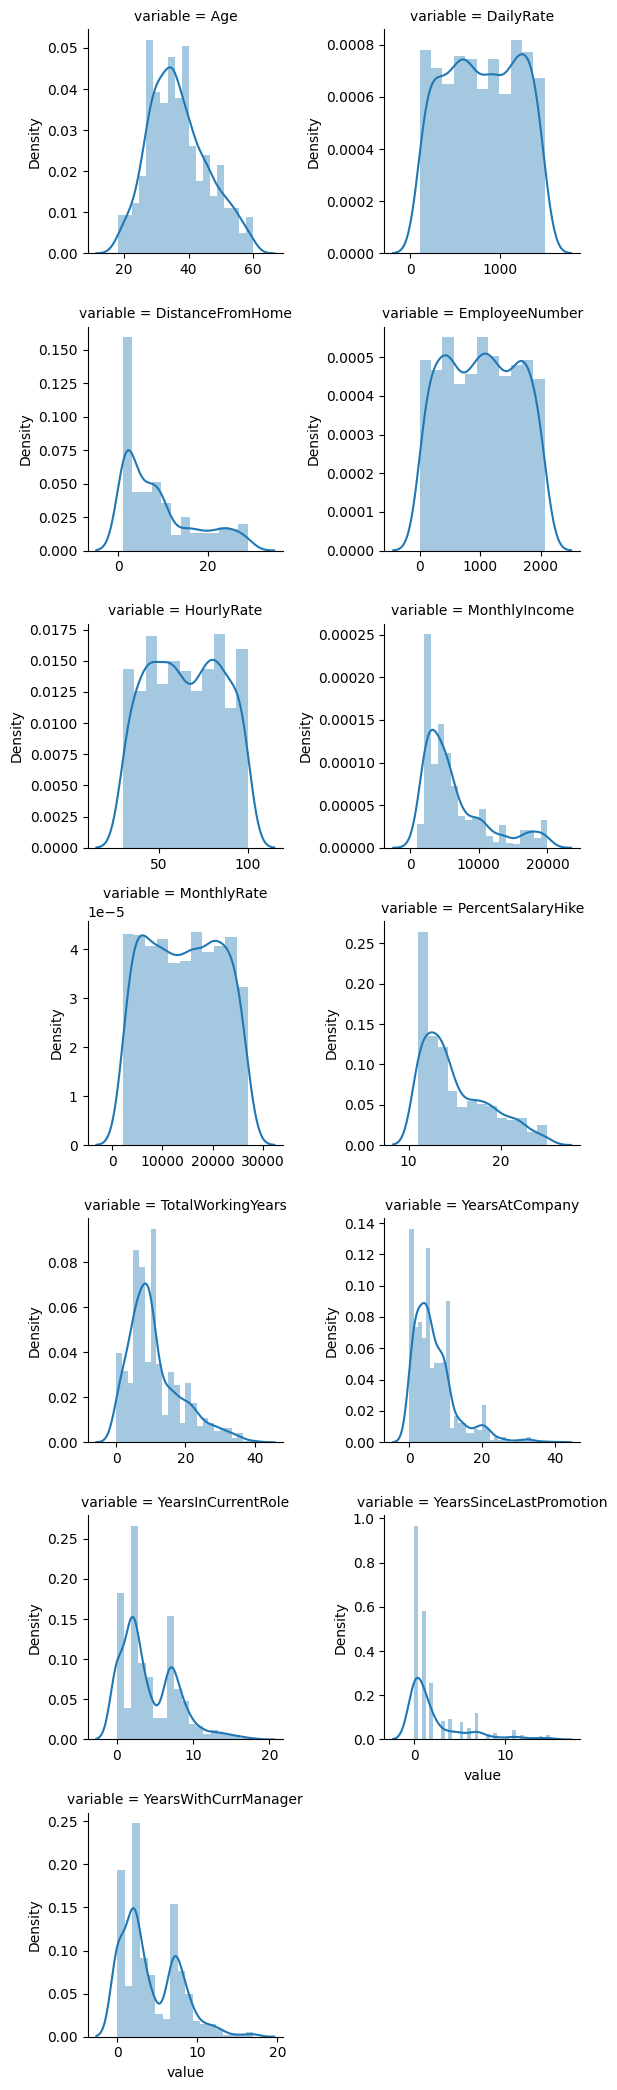

In [18]:
f = pd.melt(data_train, value_vars=numerical_serial_fea)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

In [19]:
for i in category_fea:
    print(data_train[i].value_counts())
    print('*'*30)
    print()

Attrition
No     988
Yes    188
Name: count, dtype: int64
******************************

BusinessTravel
Travel_Rarely        830
Travel_Frequently    220
Non-Travel           126
Name: count, dtype: int64
******************************

Department
Research & Development    772
Sales                     351
Human Resources            53
Name: count, dtype: int64
******************************

EducationField
Life Sciences       490
Medical             372
Marketing           124
Technical Degree    107
Other                60
Human Resources      23
Name: count, dtype: int64
******************************

Gender
Male      713
Female    463
Name: count, dtype: int64
******************************

JobRole
Sales Executive              258
Research Scientist           240
Laboratory Technician        210
Manufacturing Director       117
Healthcare Representative     98
Manager                       81
Sales Representative          66
Research Director             63
Human Resources      

#### Attrition
##### No     988
##### Yes    188

In [20]:
attrition_yes = data_train.loc[data_train['Attrition'] == 'Yes']
attrition_no = data_train.loc[data_train['Attrition'] == 'No']

In [21]:
category_fea

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [22]:
attrition_yes.groupby('BusinessTravel')['BusinessTravel'].count()/len(attrition_yes)

BusinessTravel
Non-Travel           0.047872
Travel_Frequently    0.297872
Travel_Rarely        0.654255
Name: BusinessTravel, dtype: float64

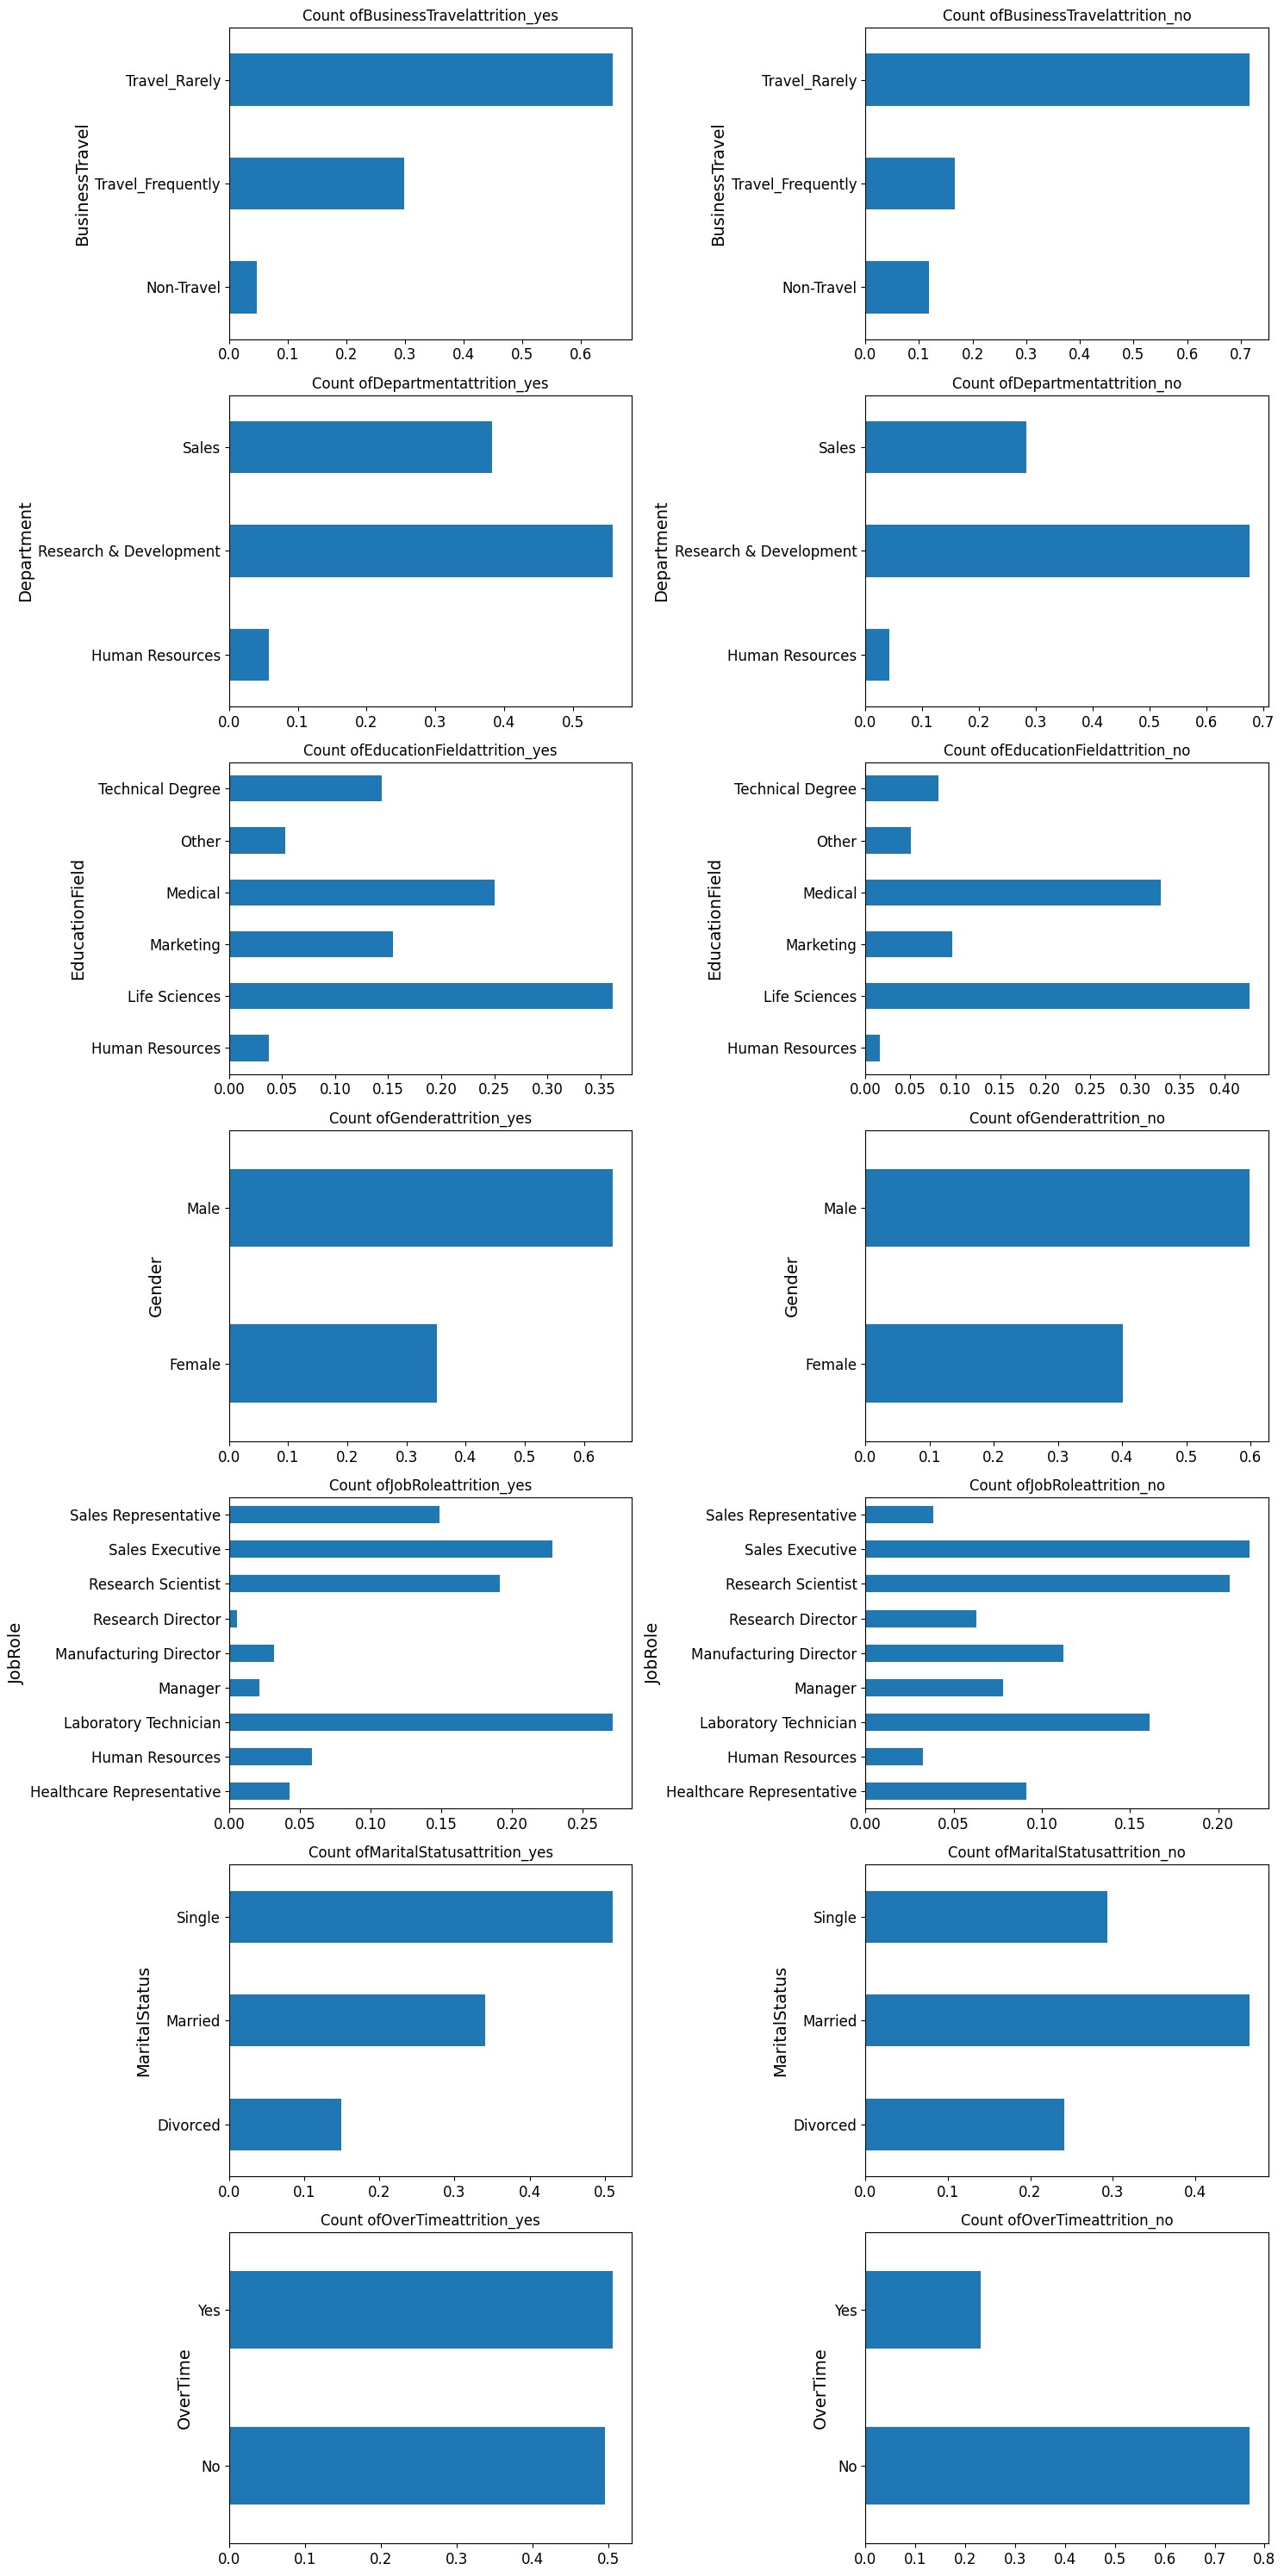

In [23]:
fig, ax = plt.subplots(7, 2, figsize=(15, 30))  # 调整 figsize 以更好地展示所有子图
for index,i in enumerate(category_fea[1:]):
    (attrition_yes.groupby(i)[i].count()/len(attrition_yes)).plot(kind='barh', ax=ax[index, 0], title='Count of' + i + 'attrition_yes',fontsize=12)
    (attrition_no.groupby(i)[i].count()/len(attrition_no)).plot(kind='barh', ax=ax[index, 1], title='Count of' + i + 'attrition_no',fontsize=12)
    ax[index, 0].set_ylabel(i, fontsize=14)
    ax[index, 1].set_ylabel(i, fontsize=14)
plt.tight_layout()  # 优化布局以避免子图重叠
plt.show()


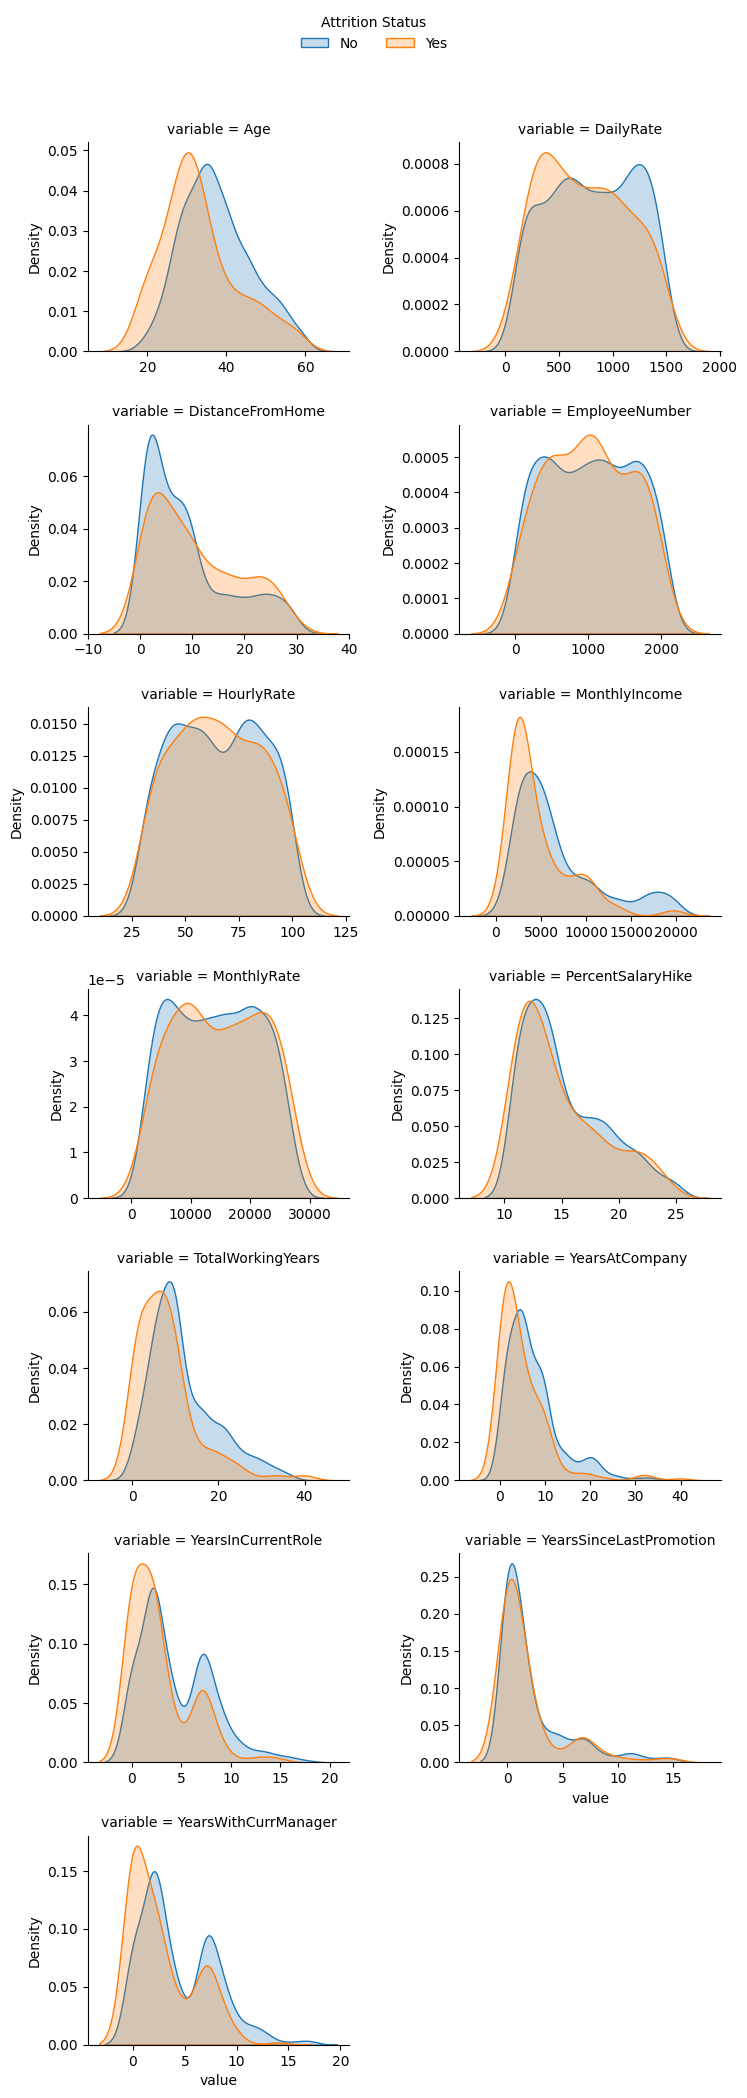

In [24]:
f_no = pd.melt(attrition_no, value_vars=numerical_serial_fea)
f_no['Attrition'] = 'No'  
f_yes = pd.melt(attrition_yes, value_vars=numerical_serial_fea)
f_yes['Attrition'] = 'Yes'

f_combined = pd.concat([f_no, f_yes])


g = sns.FacetGrid(f_combined, col="variable", hue="Attrition", col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value", hist=False, kde_kws={'shade': True})


g.add_legend(title="Attrition Status", loc='upper center', bbox_to_anchor=(0.5, 1), ncol=2)

plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()

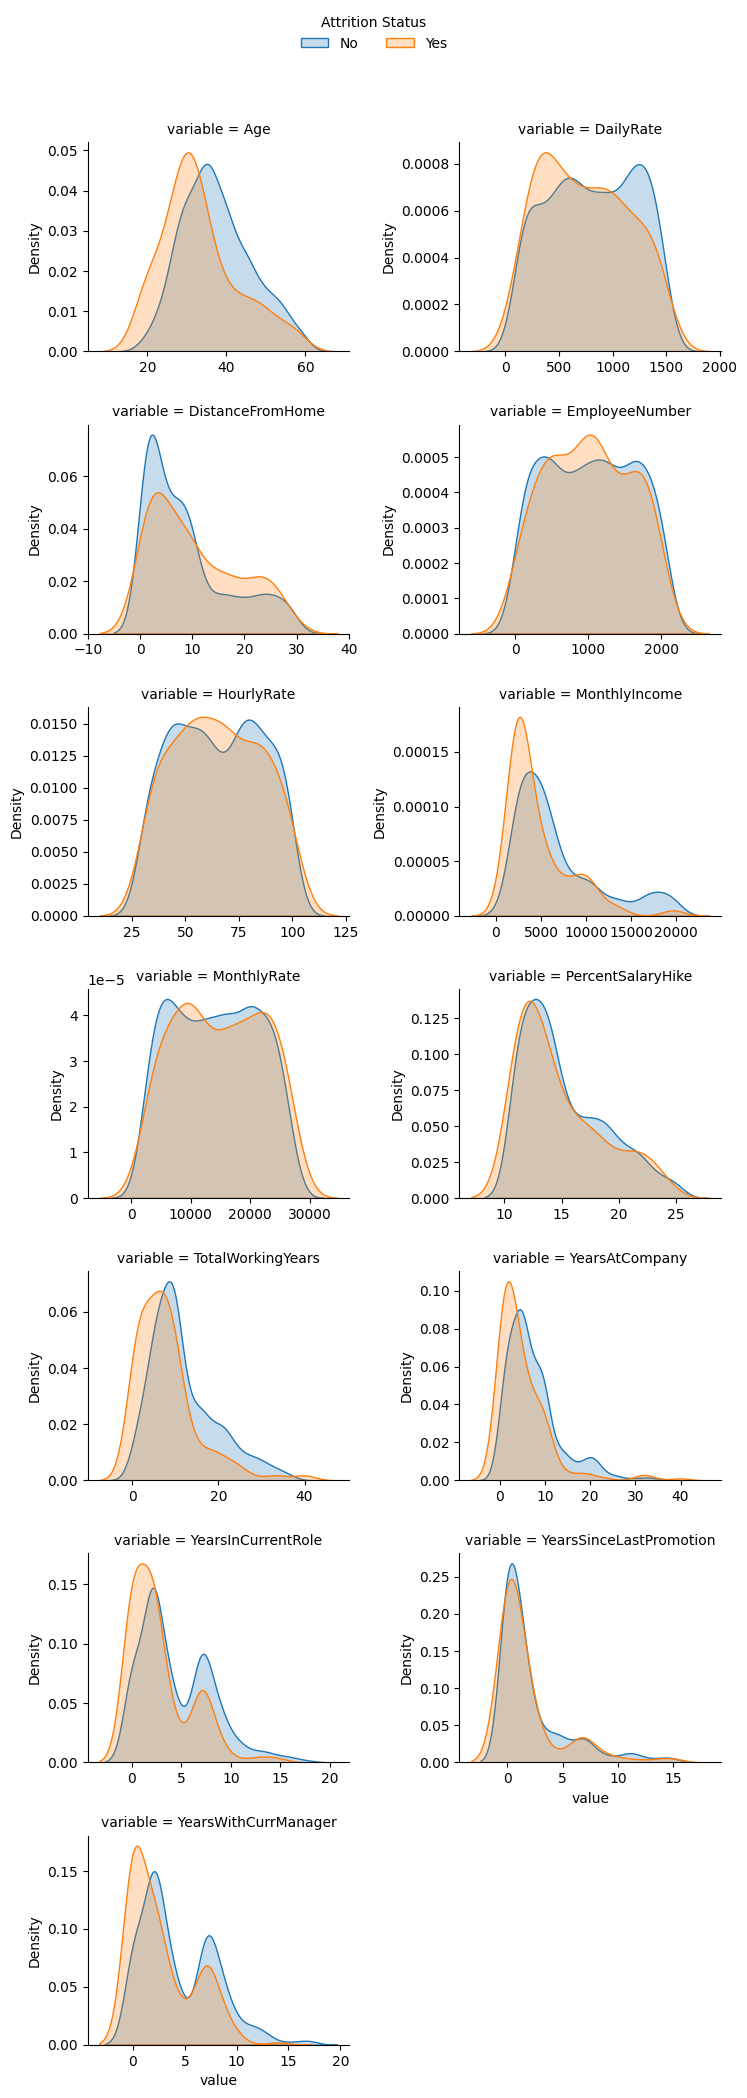

In [25]:

g = sns.FacetGrid(f_combined, col="variable", hue="Attrition", col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value", hist=False, kde_kws={'shade': True})


g.add_legend(title="Attrition Status", loc='upper center', bbox_to_anchor=(0.5, 1), ncol=2)

plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()

In [26]:
# 假设数据和变量已经被定义
f_no = pd.melt(attrition_no, value_vars=numerical_serial_fea)
f_no['Attrition'] = 'No'
f_yes = pd.melt(attrition_yes, value_vars=numerical_serial_fea)
f_yes['Attrition'] = 'Yes'

f_combined = pd.concat([f_no, f_yes])

In [27]:
f_combined

,variable,value,Attrition
0,Age,58,No
1,Age,45,No
2,Age,40,No
3,Age,36,No
4,Age,52,No
...,...,...,...
2439,YearsWithCurrManager,0,Yes
2440,YearsWithCurrManager,2,Yes
2441,YearsWithCurrManager,0,Yes
2442,YearsWithCurrManager,3,Yes


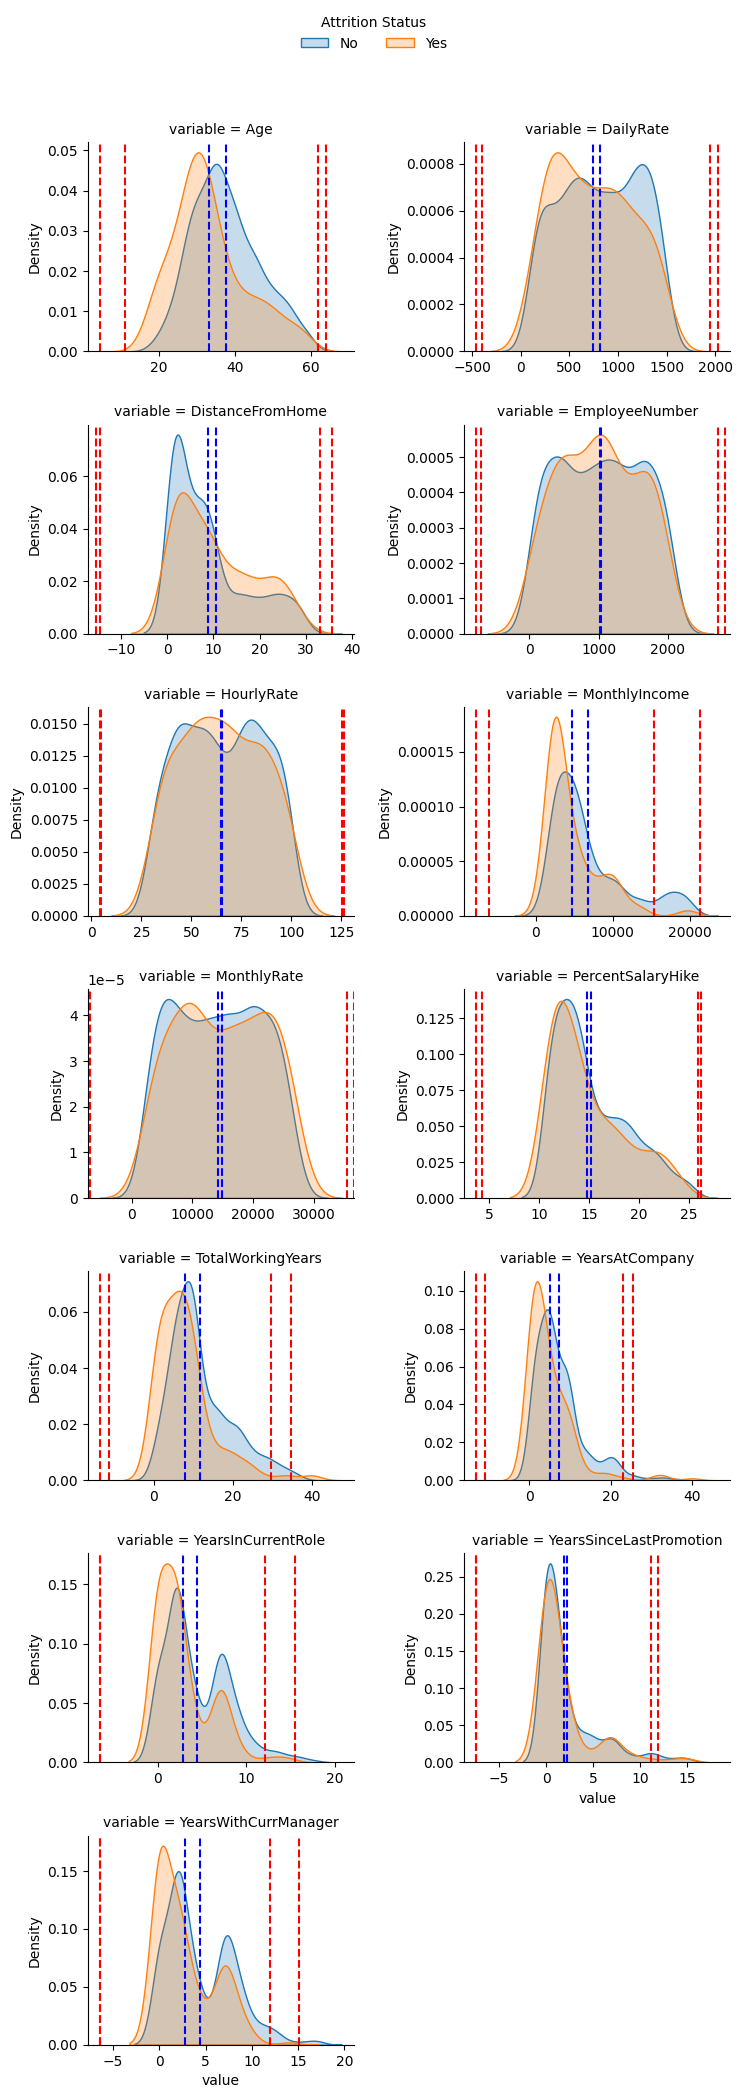

In [28]:
# 创建FacetGrid
g = sns.FacetGrid(f_combined, col="variable", hue="Attrition", col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value", hist=False, kde_kws={'shade': True})

# 计算均值和标准差，并添加垂直线
for ax, variable in zip(g.axes.flatten(), numerical_serial_fea):
    # 分别处理“是”和“否”的数据
    for attrition in ["Yes", "No"]:
        subset = f_combined[(f_combined['variable'] == variable) & (f_combined['Attrition'] == attrition)]
        mean = subset['value'].mean()
        std = subset['value'].std()
        
        ax.axvline(mean, color='blue', linestyle='--')  # 画出均值线
        ax.axvline(mean - 3 * std, color='red', linestyle='--')  # 画出均值-3标准差
        ax.axvline(mean + 3 * std, color='red', linestyle='--')  # 画出均值+3标准差

# 添加图例和调整布局
g.add_legend(title="Attrition Status", loc='upper center', bbox_to_anchor=(0.5, 1), ncol=2)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [29]:
# 找到3个标准差以外的数据
import pandas as pd

# 假设 attrition_no 和 attrition_yes 已经被正确加载，并且它们包含数值型列
# 假设 numerical_serial_fea 是包含数值型特征名称的列表

outliers_no = pd.DataFrame()
outliers_yes = pd.DataFrame()

# 对于不离职数据集
for feature in numerical_serial_fea:
    mean = attrition_no[feature].mean()
    std = attrition_no[feature].std()
    condition = (attrition_no[feature] < mean - 3* std) | (attrition_no[feature] > mean + 3 * std)
    outliers_no = pd.concat([outliers_no, attrition_no[condition]])

# 对于离职数据集
for feature in numerical_serial_fea:
    mean = attrition_yes[feature].mean()
    std = attrition_yes[feature].std()
    condition = (attrition_yes[feature] < mean - 3 * std) | (attrition_yes[feature] > mean + 3 * std)
    outliers_yes = pd.concat([outliers_yes, attrition_yes[condition]])

# 现在 outliers_no 和 outliers_yes 包含了超过3个标准差的数据
print("Outliers in No Attrition Data:")
print(len(outliers_no))
print("\nOutliers in Yes Attrition Data:")
print(len(outliers_yes))


Outliers in No Attrition Data:
71

Outliers in Yes Attrition Data:
19


In [30]:
attrition_yes

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
4,25,Yes,Travel_Frequently,599,Sales,24,1,Life Sciences,1273,3,...,3,4,0,1,4,3,1,0,1,0
13,34,Yes,Travel_Frequently,988,Human Resources,23,3,Human Resources,590,2,...,3,3,3,11,2,3,3,2,0,2
26,19,Yes,Travel_Rarely,489,Human Resources,2,2,Technical Degree,566,1,...,3,3,0,1,3,4,1,0,0,0
29,20,Yes,Travel_Rarely,500,Sales,2,3,Medical,922,3,...,3,4,0,2,3,2,2,2,0,2
39,27,Yes,Travel_Rarely,135,Research & Development,17,4,Life Sciences,1405,4,...,3,4,0,8,2,3,8,2,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145,26,Yes,Travel_Rarely,1330,Research & Development,21,3,Medical,1107,1,...,4,3,1,1,0,2,1,1,0,0
1147,23,Yes,Travel_Rarely,1320,Research & Development,8,1,Medical,1684,4,...,3,1,0,5,2,3,5,4,1,2
1154,21,Yes,Travel_Rarely,1334,Research & Development,10,3,Life Sciences,1079,3,...,3,1,0,1,6,2,1,0,1,0
1158,43,Yes,Travel_Rarely,1372,Sales,9,3,Marketing,1188,1,...,3,2,0,7,2,2,4,3,1,3


In [31]:
print(len(attrition_yes)/len(attrition_no))
print('len(attrition_yes)',len(attrition_yes),'\n','len(attrition_no)',len(attrition_no))

0.1902834008097166
len(attrition_yes) 188 
 len(attrition_no) 988


In [32]:
outliers_yes

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
117,55,Yes,Travel_Rarely,725,Research & Development,2,3,Medical,787,4,...,3,4,1,24,2,3,5,2,1,4
867,58,Yes,Travel_Rarely,286,Research & Development,2,4,Life Sciences,825,4,...,3,4,0,40,2,3,31,15,13,8
1017,52,Yes,Travel_Rarely,266,Sales,2,1,Marketing,1038,1,...,3,4,1,33,3,3,32,14,6,9
800,58,Yes,Travel_Rarely,147,Research & Development,23,4,Medical,165,4,...,3,4,1,40,3,2,40,10,15,6
867,58,Yes,Travel_Rarely,286,Research & Development,2,4,Life Sciences,825,4,...,3,4,0,40,2,3,31,15,13,8
884,53,Yes,Travel_Rarely,607,Research & Development,2,5,Technical Degree,1572,3,...,3,2,1,34,4,3,33,7,1,9
1017,52,Yes,Travel_Rarely,266,Sales,2,1,Marketing,1038,1,...,3,4,1,33,3,3,32,14,6,9
800,58,Yes,Travel_Rarely,147,Research & Development,23,4,Medical,165,4,...,3,4,1,40,3,2,40,10,15,6
867,58,Yes,Travel_Rarely,286,Research & Development,2,4,Life Sciences,825,4,...,3,4,0,40,2,3,31,15,13,8
884,53,Yes,Travel_Rarely,607,Research & Development,2,5,Technical Degree,1572,3,...,3,2,1,34,4,3,33,7,1,9


In [33]:
# a = 0
# for i in outliers_yes:
#     for t in attrition_yes:
#         if i == t:
#             print(i,t)
#             a += 1
# print(a)

In [34]:
attrition_no.merge(outliers_no, how='inner', indicator=True)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,_merge
0,47,No,Travel_Rarely,1001,Research & Development,4,3,Life Sciences,1827,3,...,3,1,28,4,3,22,11,14,10,both
1,60,No,Travel_Frequently,1499,Sales,28,3,Marketing,573,3,...,4,0,22,5,4,18,13,13,11,both
2,60,No,Travel_Rarely,422,Research & Development,7,3,Life Sciences,549,1,...,4,0,33,5,1,29,8,11,10,both
3,44,No,Travel_Rarely,1199,Research & Development,4,2,Life Sciences,1288,3,...,4,2,26,4,2,25,9,14,13,both
4,41,No,Travel_Rarely,263,Research & Development,6,3,Medical,957,4,...,3,0,20,3,3,18,13,2,17,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,58,No,Travel_Rarely,682,Sales,10,4,Medical,131,4,...,3,0,38,1,2,37,10,1,8,both
67,45,No,Non-Travel,1238,Research & Development,1,1,Life Sciences,1712,3,...,4,1,25,3,2,23,15,14,4,both
68,44,No,Travel_Rarely,477,Research & Development,7,4,Medical,36,1,...,4,1,24,4,3,22,6,5,17,both
69,56,No,Travel_Rarely,1369,Research & Development,23,3,Life Sciences,1373,4,...,1,1,33,0,3,19,16,15,9,both


In [35]:
attrition_yes_3std = attrition_yes.merge(outliers_yes, how='outer', indicator=True).query('_merge == "left_only"').drop(columns=['_merge'])
attrition_no_3std = attrition_no.merge(outliers_no, how='outer', indicator=True).query('_merge == "left_only"').drop(columns=['_merge'])

In [36]:
# 删除包含异常值的行
attrition_no_filtered = attrition_no.drop(outliers_no.index)
attrition_yes_filtered = attrition_yes.drop(outliers_yes.index)


In [37]:
attrition_yes

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
4,25,Yes,Travel_Frequently,599,Sales,24,1,Life Sciences,1273,3,...,3,4,0,1,4,3,1,0,1,0
13,34,Yes,Travel_Frequently,988,Human Resources,23,3,Human Resources,590,2,...,3,3,3,11,2,3,3,2,0,2
26,19,Yes,Travel_Rarely,489,Human Resources,2,2,Technical Degree,566,1,...,3,3,0,1,3,4,1,0,0,0
29,20,Yes,Travel_Rarely,500,Sales,2,3,Medical,922,3,...,3,4,0,2,3,2,2,2,0,2
39,27,Yes,Travel_Rarely,135,Research & Development,17,4,Life Sciences,1405,4,...,3,4,0,8,2,3,8,2,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145,26,Yes,Travel_Rarely,1330,Research & Development,21,3,Medical,1107,1,...,4,3,1,1,0,2,1,1,0,0
1147,23,Yes,Travel_Rarely,1320,Research & Development,8,1,Medical,1684,4,...,3,1,0,5,2,3,5,4,1,2
1154,21,Yes,Travel_Rarely,1334,Research & Development,10,3,Life Sciences,1079,3,...,3,1,0,1,6,2,1,0,1,0
1158,43,Yes,Travel_Rarely,1372,Sales,9,3,Marketing,1188,1,...,3,2,0,7,2,2,4,3,1,3


In [38]:
len(attrition_no_filtered),len(attrition_yes_filtered)

(931, 181)

In [39]:
len(attrition_no_3std),len(attrition_yes_3std)

(931, 181)

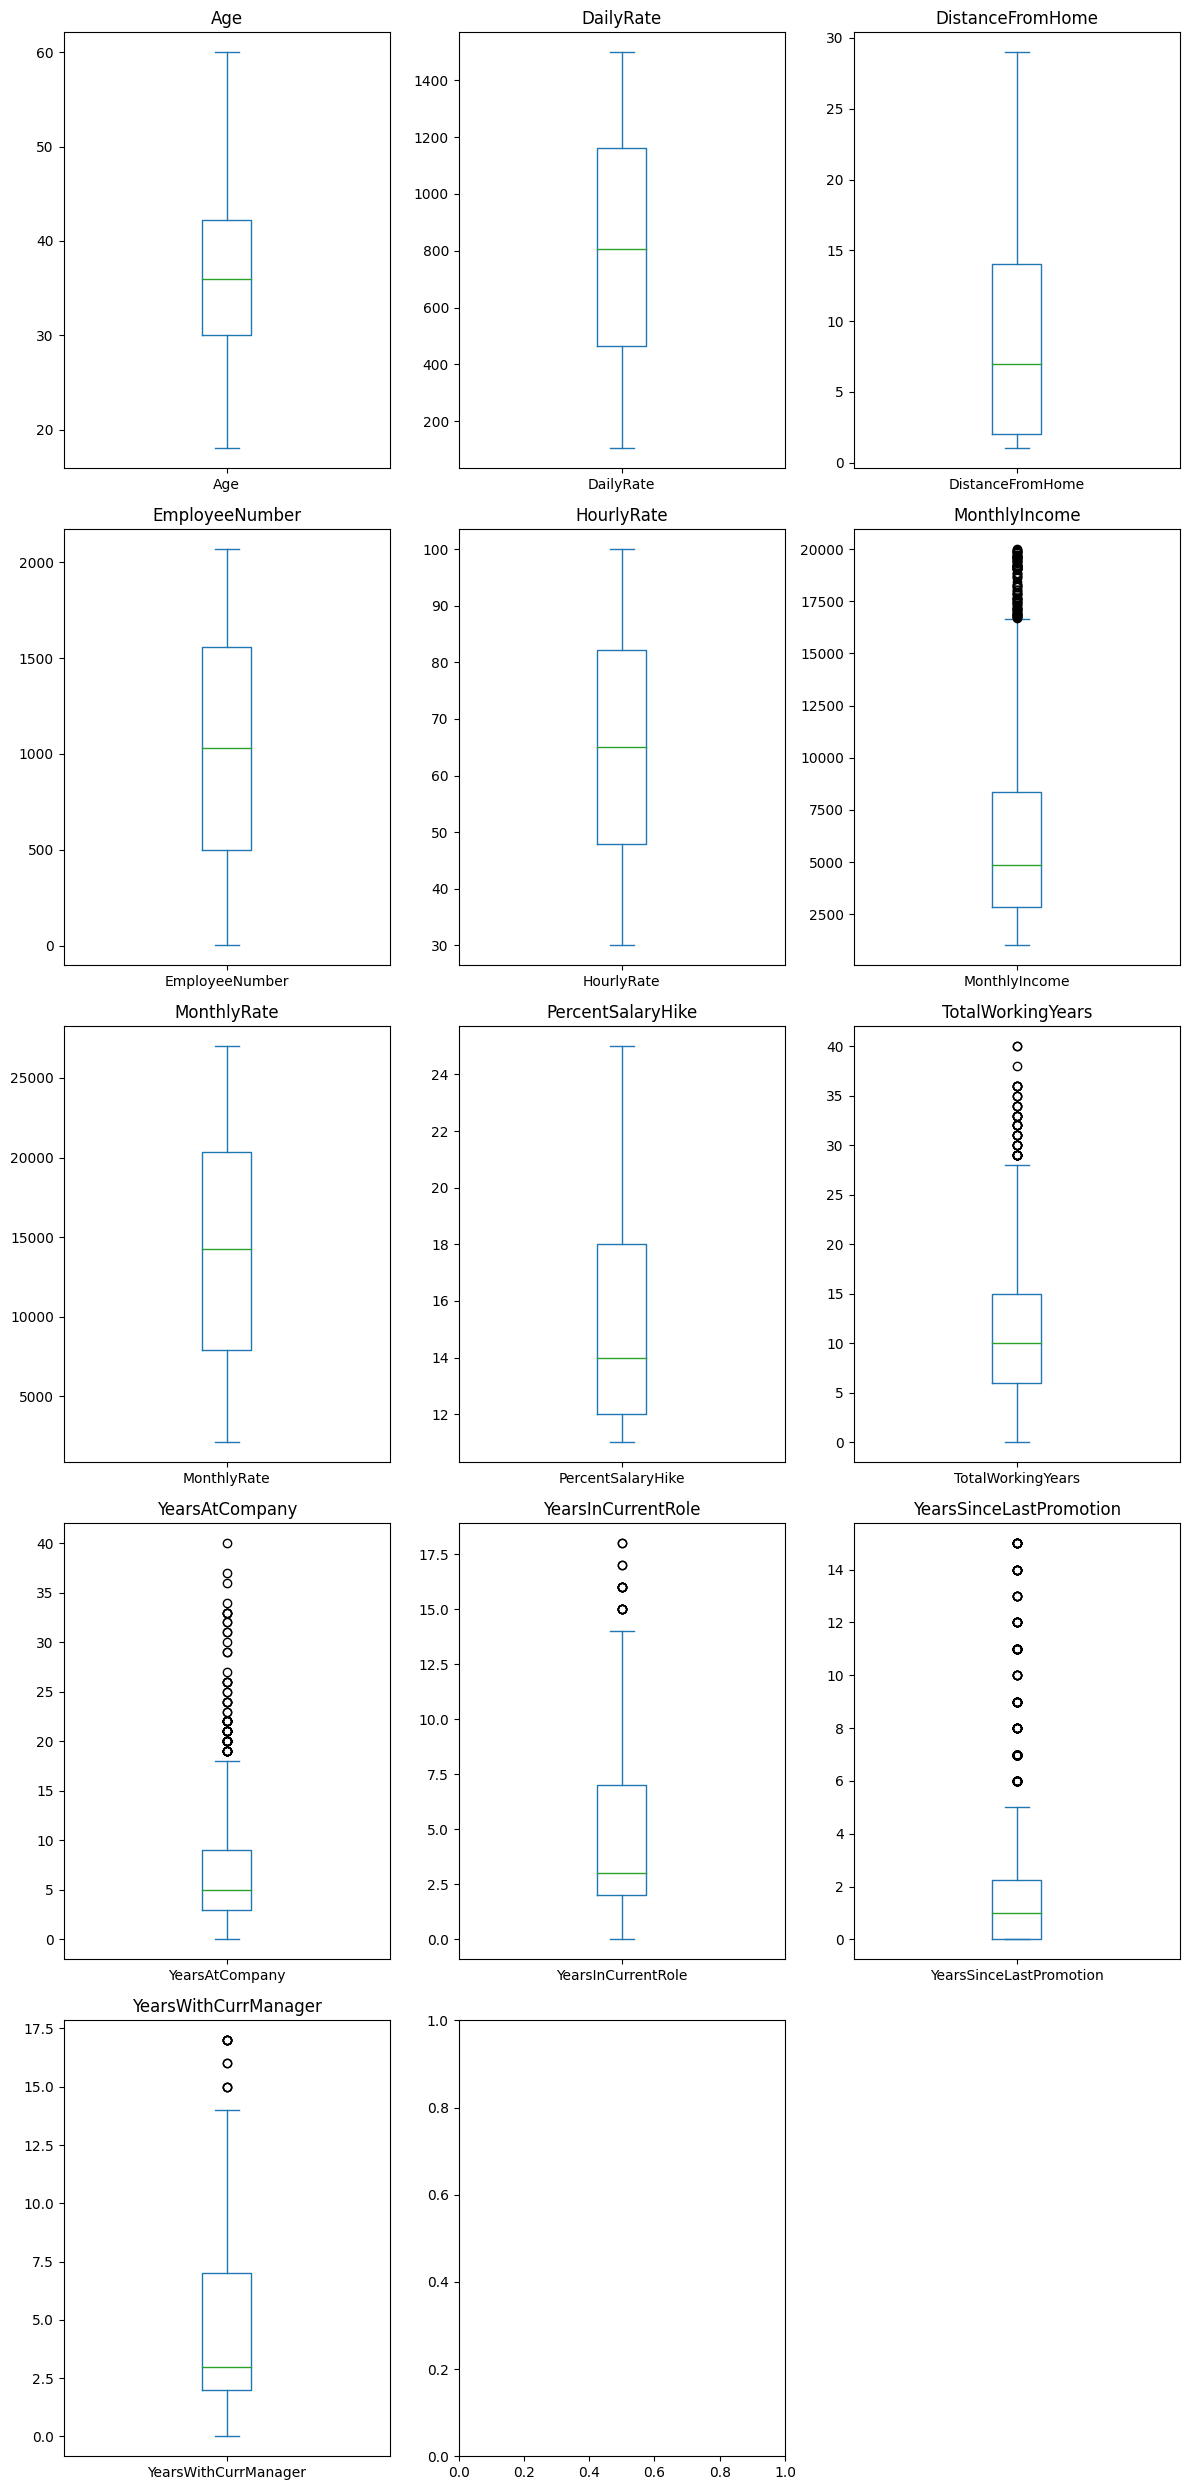

In [40]:
# 删除异常值之前的箱线图
num_features = len(numerical_serial_fea)
num_rows = (num_features + 2) // 3  

fig, axes = plt.subplots(num_rows, 3, figsize=(12, num_rows * 5))  
axes = axes.flatten()  

for i in range(num_features):
    data_train[numerical_serial_fea[i]].plot(kind='box', ax=axes[i])
    axes[i].set_title(numerical_serial_fea[i]) 


if num_features % 2 != 0:
    axes[-1].axis('off')


plt.tight_layout()
plt.show()


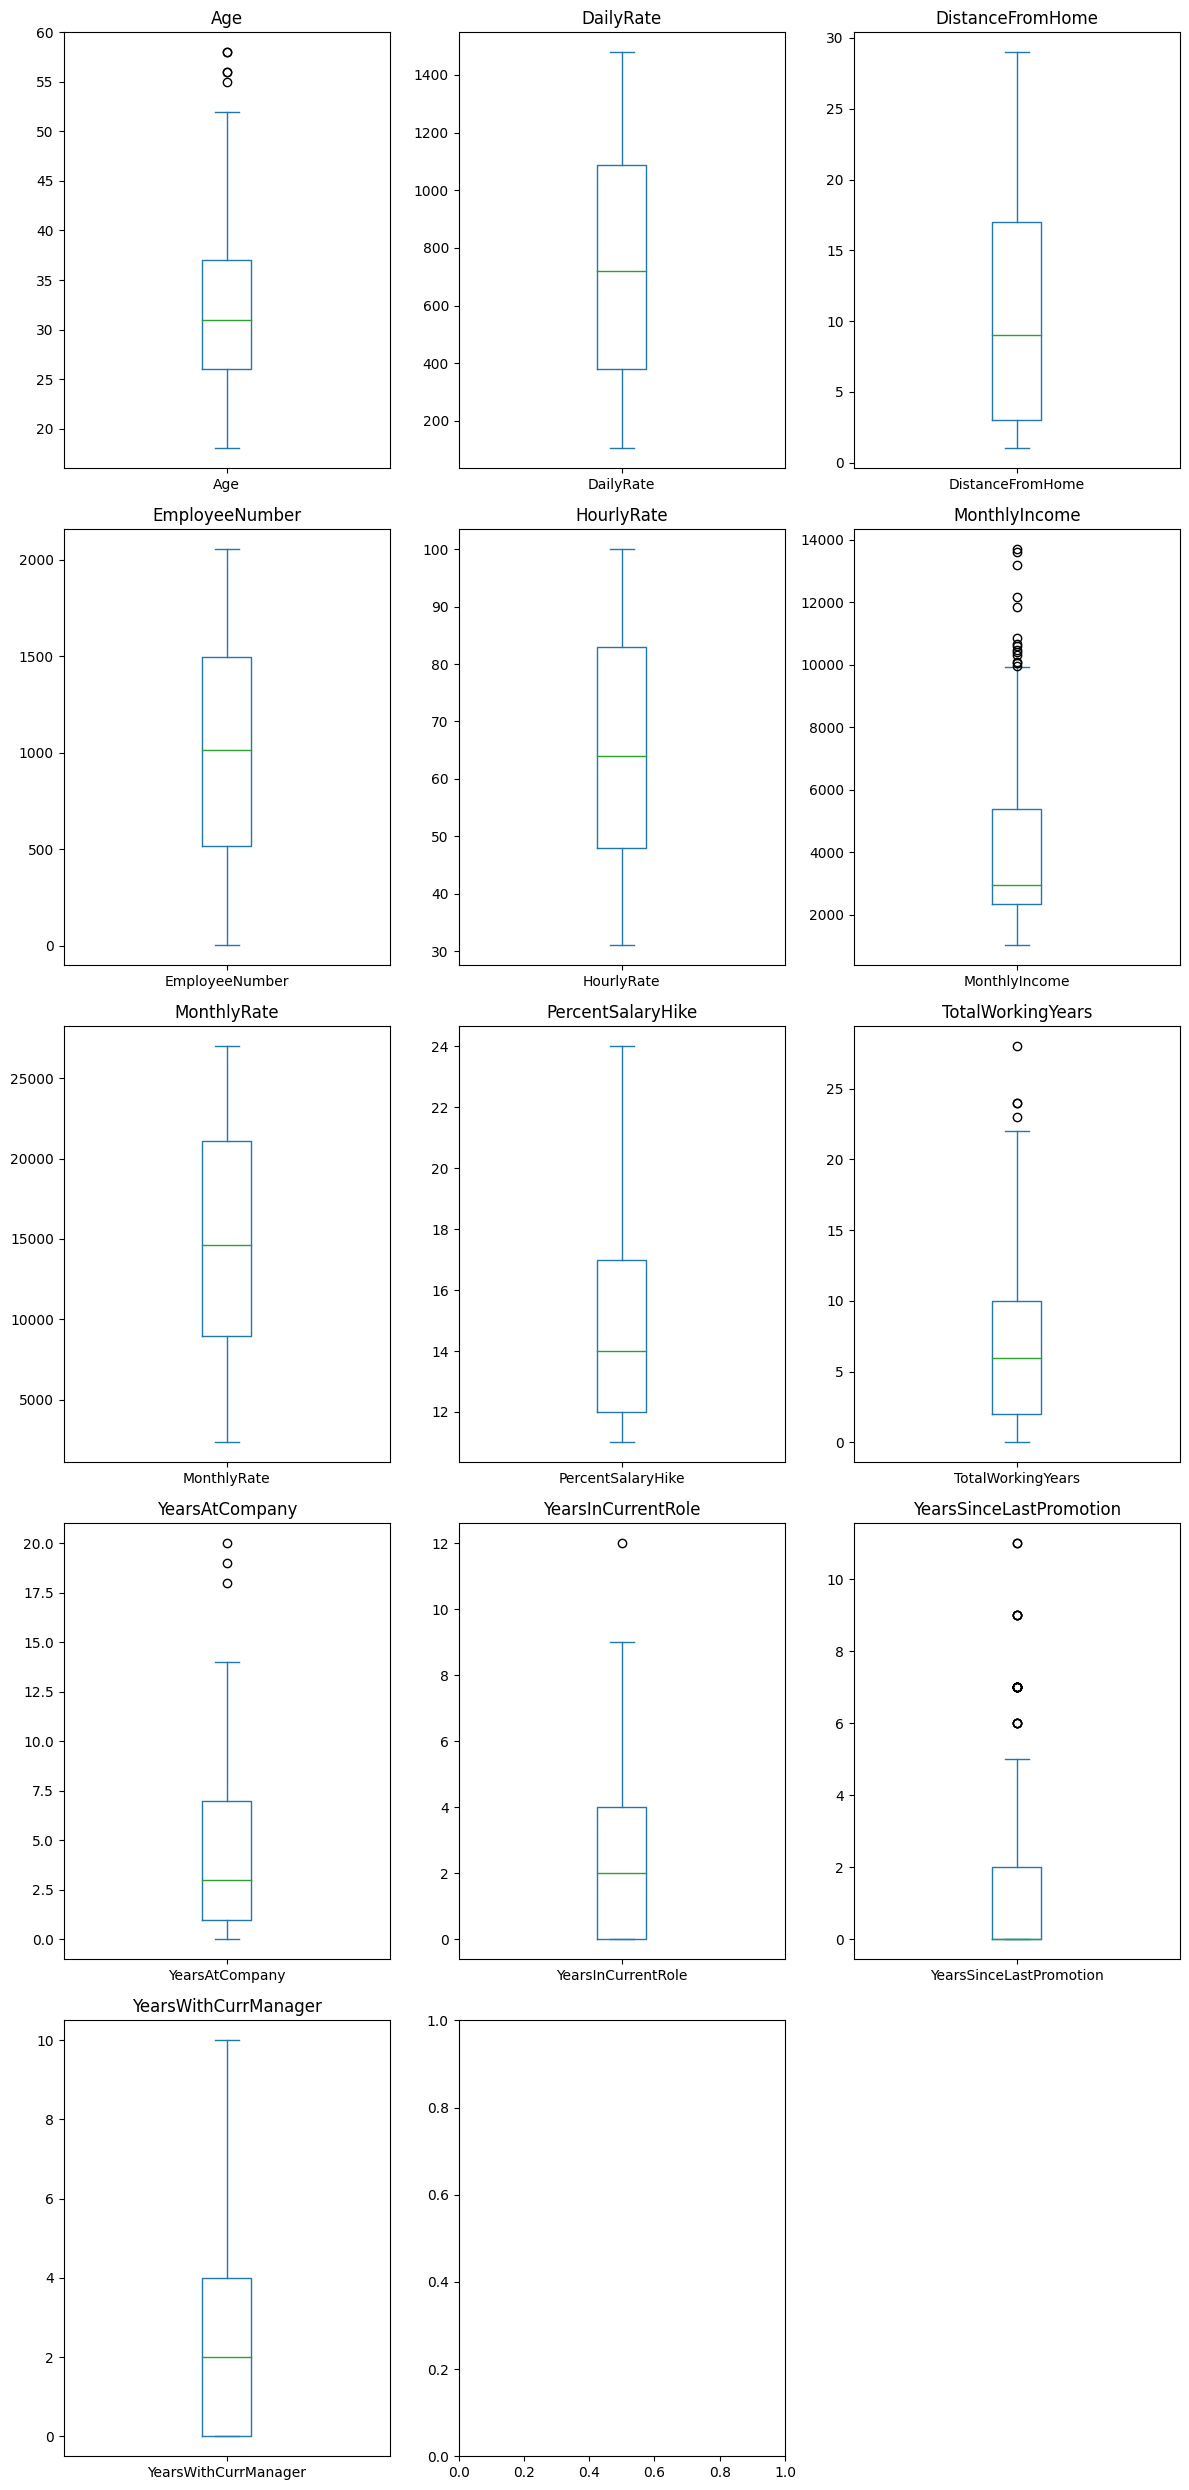

In [41]:
num_features = len(numerical_serial_fea)
num_rows = (num_features + 2) // 3  

fig, axes = plt.subplots(num_rows, 3, figsize=(12, num_rows * 5))  
axes = axes.flatten()  

for i in range(num_features):
    attrition_yes_filtered[numerical_serial_fea[i]].plot(kind='box', ax=axes[i])
    axes[i].set_title(numerical_serial_fea[i]) 


if num_features % 2 != 0:
    axes[-1].axis('off')


plt.tight_layout()
plt.show()

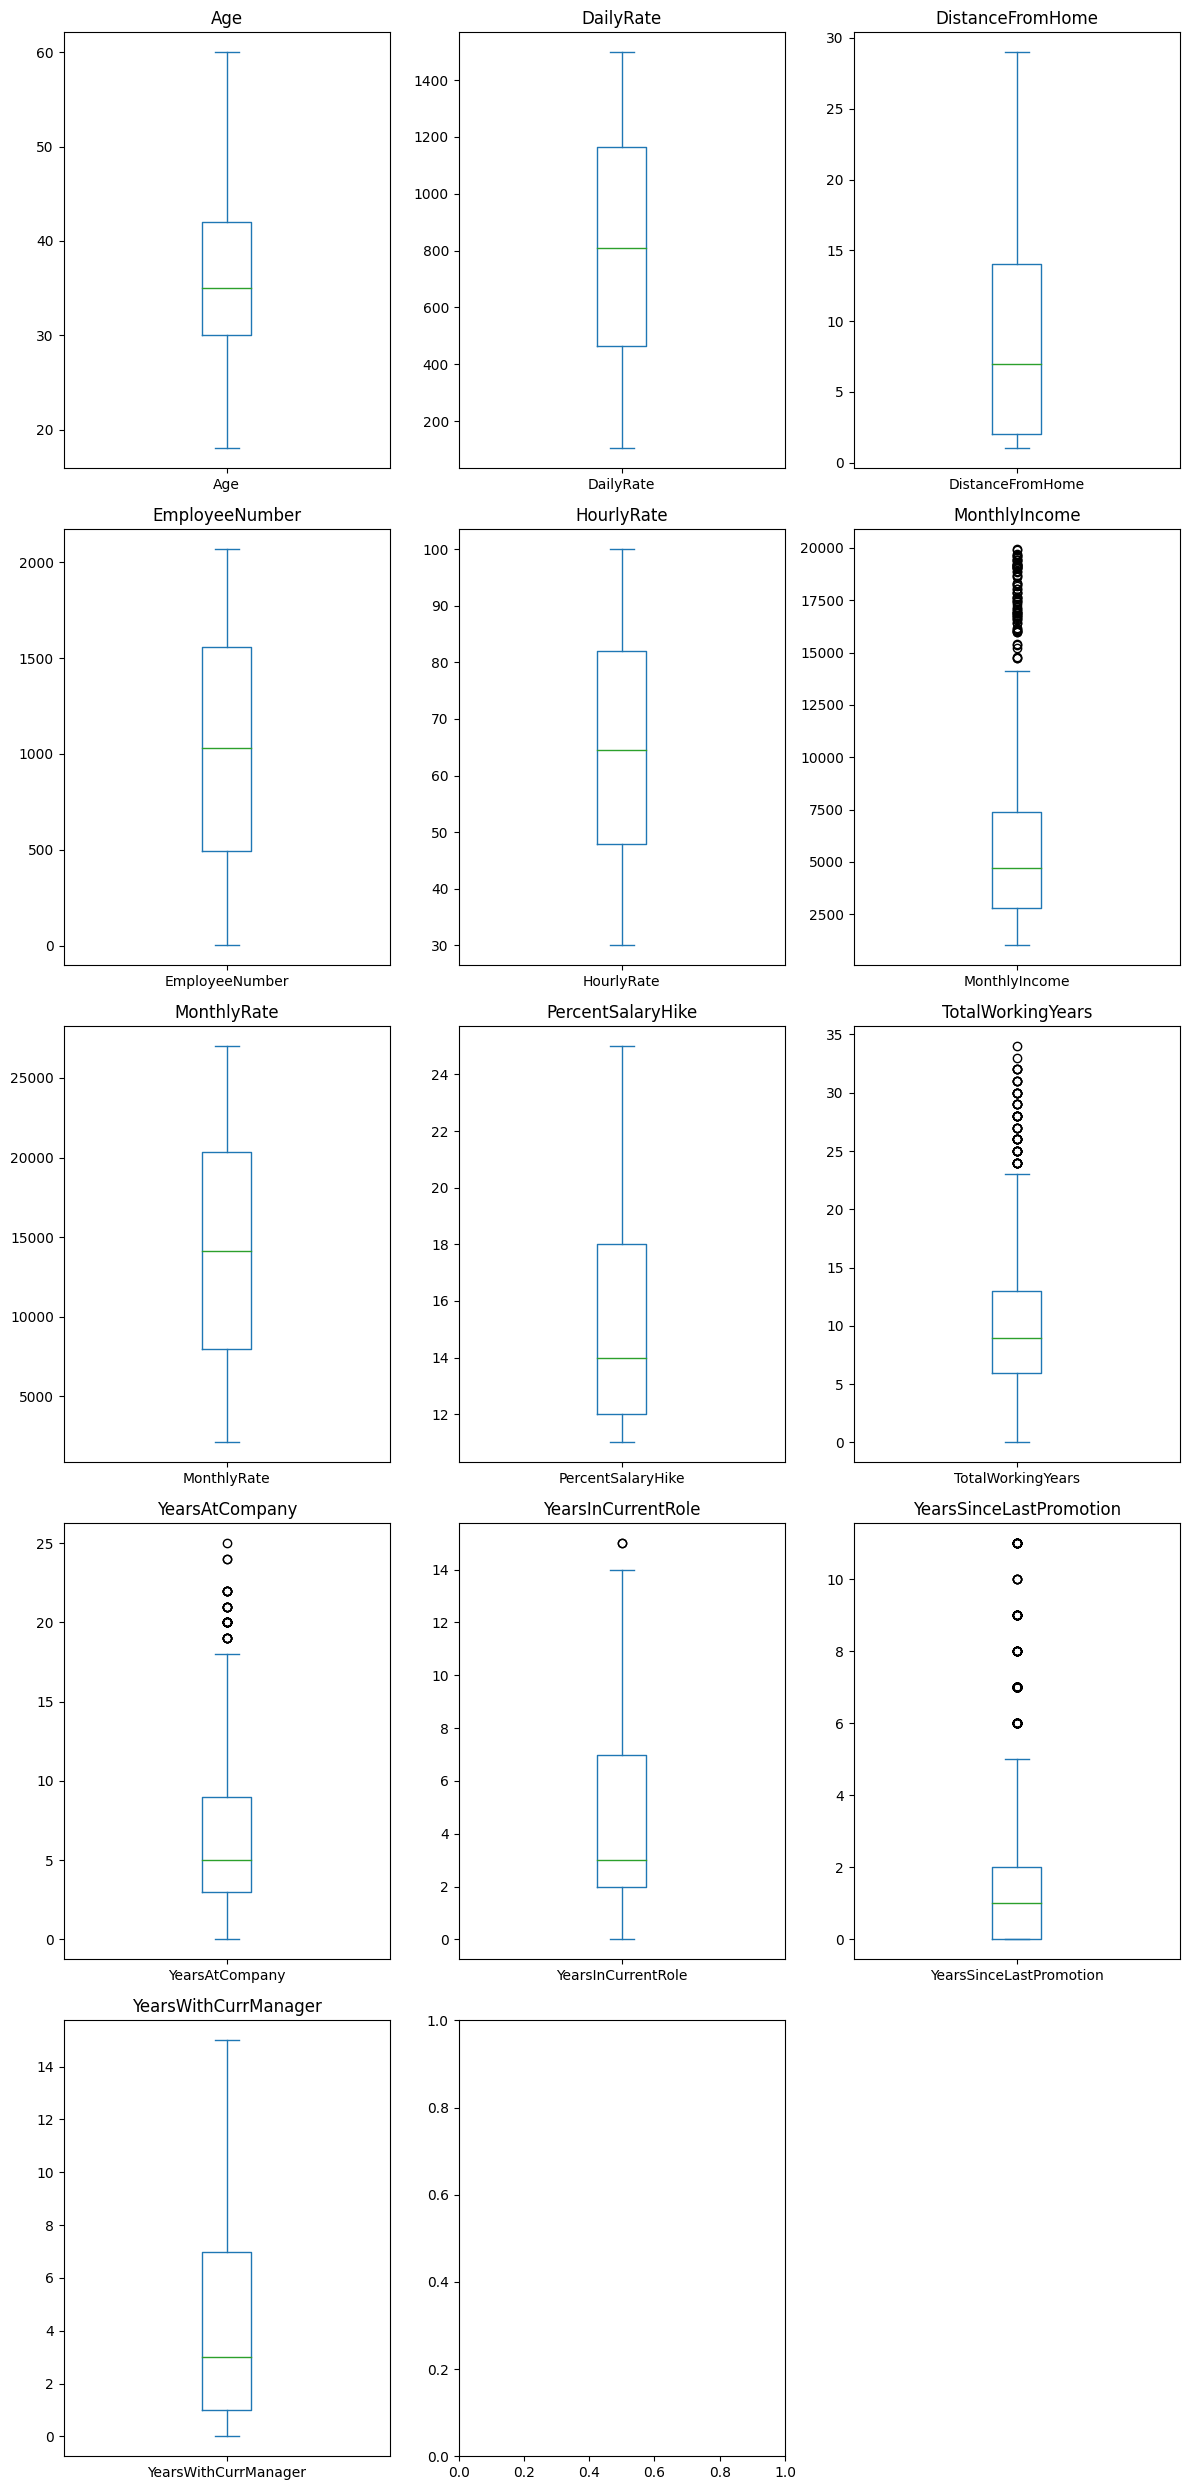

In [42]:
# 删除异常值之后的箱线图
num_features = len(numerical_serial_fea)
num_rows = (num_features + 2) // 3  

fig, axes = plt.subplots(num_rows, 3, figsize=(12, num_rows * 5))  
axes = axes.flatten()  

for i in range(num_features):
    pd.concat([attrition_no_filtered,attrition_yes_filtered])[numerical_serial_fea[i]].plot(kind='box', ax=axes[i])
    axes[i].set_title(numerical_serial_fea[i]) 


if num_features % 2 != 0:
    axes[-1].axis('off')


plt.tight_layout()
plt.show()

In [43]:
#重复值查找--无重复值
df = pd.concat([attrition_no_filtered,attrition_yes_filtered]).drop(columns='Attrition').reset_index(drop=True)
df.duplicated().sum()
# df.head()

0

In [44]:
data = pd.concat([attrition_no_filtered,attrition_yes_filtered]).reset_index(drop=True)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,58,No,Travel_Rarely,605,Sales,21,3,Life Sciences,1938,4,...,3,3,1,29,2,2,1,0,0,0
1,45,No,Travel_Rarely,950,Research & Development,28,3,Technical Degree,1546,4,...,4,4,1,8,3,3,5,4,0,3
2,40,No,Travel_Rarely,300,Sales,26,3,Marketing,1066,3,...,3,2,1,8,3,2,7,7,7,5
3,36,No,Non-Travel,1434,Sales,8,4,Life Sciences,789,1,...,3,2,0,10,1,3,10,7,0,9
4,52,No,Travel_Rarely,1490,Research & Development,4,2,Life Sciences,546,4,...,3,4,0,31,2,1,5,2,1,4


In [45]:
scaler = StandardScaler()
# 计算训练数据的平均值和标准差以及转换数据
data_scaled = scaler.fit_transform(data[numerical_serial_fea])
data_scaled_test = scaler.fit_transform(data_test[numerical_serial_fea])
# 将标准化后的数据转换回 DataFrame
data_scaled = pd.DataFrame(data_scaled, columns=data[numerical_serial_fea].columns)
data_scaled_test = pd.DataFrame(data_scaled_test, columns=data[numerical_serial_fea].columns)
data[numerical_serial_fea] = data_scaled
data_test[numerical_serial_fea] = data_scaled_test

In [46]:
data[numerical_serial_fea]

,Age,DailyRate,DistanceFromHome,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,2.502581,-0.491017,1.451630,1.526876,0.349420,2.796124,-0.348504,-0.596500,2.805524,-1.093560,-1.177459,-0.702332,-1.151561
1,1.014537,0.357712,2.312477,0.869394,1.586700,-0.905011,-1.366135,1.332522,-0.330646,-0.238399,0.039677,-0.702332,-0.242950
2,0.442213,-1.241343,2.066521,0.064315,0.448403,0.567638,1.134266,-0.320925,-0.330646,0.189181,0.952530,2.094064,0.362791
3,-0.015646,1.548393,-0.147087,-0.400283,0.547385,0.377444,0.001484,-0.045351,-0.031963,0.830552,0.952530,-0.702332,1.574272
4,1.815791,1.686158,-0.639000,-0.807855,-1.729209,2.485796,-0.554271,-0.596500,3.104207,-0.238399,-0.568891,-0.302847,0.059920
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107,-1.160295,1.292544,1.451630,0.133082,-1.382771,-0.847413,0.730957,1.332522,-1.376036,-1.093560,-0.873175,-0.702332,-1.151561
1108,-1.503689,1.267944,-0.147087,1.100855,1.388735,-0.468436,0.902973,-1.147649,-0.778671,-0.238399,0.039677,-0.302847,-0.545820
1109,-1.732619,1.302385,0.098869,0.086119,-1.432262,-1.073341,0.431028,-0.596500,-1.376036,-1.093560,-1.177459,-0.302847,-1.151561
1110,0.785608,1.395868,-0.024109,0.268939,0.992806,-0.149409,-0.670697,-0.596500,-0.479988,-0.452189,-0.264607,-0.302847,-0.242950


In [47]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,2.502581,No,Travel_Rarely,-0.491017,Sales,1.451630,3,Life Sciences,1.526876,4,...,3,3,1,2.805524,2,2,-1.093560,-1.177459,-0.702332,-1.151561
1,1.014537,No,Travel_Rarely,0.357712,Research & Development,2.312477,3,Technical Degree,0.869394,4,...,4,4,1,-0.330646,3,3,-0.238399,0.039677,-0.702332,-0.242950
2,0.442213,No,Travel_Rarely,-1.241343,Sales,2.066521,3,Marketing,0.064315,3,...,3,2,1,-0.330646,3,2,0.189181,0.952530,2.094064,0.362791
3,-0.015646,No,Non-Travel,1.548393,Sales,-0.147087,4,Life Sciences,-0.400283,1,...,3,2,0,-0.031963,1,3,0.830552,0.952530,-0.702332,1.574272
4,1.815791,No,Travel_Rarely,1.686158,Research & Development,-0.639000,2,Life Sciences,-0.807855,4,...,3,4,0,3.104207,2,1,-0.238399,-0.568891,-0.302847,0.059920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107,-1.160295,Yes,Travel_Rarely,1.292544,Research & Development,1.451630,3,Medical,0.133082,1,...,4,3,1,-1.376036,0,2,-1.093560,-0.873175,-0.702332,-1.151561
1108,-1.503689,Yes,Travel_Rarely,1.267944,Research & Development,-0.147087,1,Medical,1.100855,4,...,3,1,0,-0.778671,2,3,-0.238399,0.039677,-0.302847,-0.545820
1109,-1.732619,Yes,Travel_Rarely,1.302385,Research & Development,0.098869,3,Life Sciences,0.086119,3,...,3,1,0,-1.376036,6,2,-1.093560,-1.177459,-0.302847,-1.151561
1110,0.785608,Yes,Travel_Rarely,1.395868,Sales,-0.024109,3,Marketing,0.268939,1,...,3,2,0,-0.479988,2,2,-0.452189,-0.264607,-0.302847,-0.242950


In [48]:
len(attrition_no_filtered)/len(attrition_yes_filtered)

5.143646408839779

In [49]:
1-len(attrition_yes_filtered)/(len(attrition_no_filtered)+len(attrition_yes_filtered))

0.8372302158273381

In [50]:
data[category_fea].nunique()


Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
OverTime          2
dtype: int64

In [51]:
data[category_fea].head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,No,Travel_Rarely,Sales,Life Sciences,Female,Manager,Married,Yes
1,No,Travel_Rarely,Research & Development,Technical Degree,Male,Research Scientist,Married,No
2,No,Travel_Rarely,Sales,Marketing,Male,Sales Executive,Married,No
3,No,Non-Travel,Sales,Life Sciences,Male,Sales Executive,Single,No
4,No,Travel_Rarely,Research & Development,Life Sciences,Female,Manager,Married,No


In [52]:
data[category_fea[0]].astype('category').cat.codes

0       0
1       0
2       0
3       0
4       0
       ..
1107    1
1108    1
1109    1
1110    1
1111    1
Length: 1112, dtype: int8

In [53]:
for feature in category_fea:
    if len(data[feature].unique()) == 2:
        # 转换为类别类型
        data[feature] = data[feature].astype('category')
        # 分配0和1
        data[feature] = data[feature].cat.codes

In [54]:
for feature in category_fea[1:]:
     if len(data_test[feature].unique()) == 2:
        data_test[feature] = data_test[feature].astype('category')
        # 分配0和1
        data_test[feature] = data_test[feature].cat.codes

In [55]:
data[category_fea]

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,0,Travel_Rarely,Sales,Life Sciences,0,Manager,Married,1
1,0,Travel_Rarely,Research & Development,Technical Degree,1,Research Scientist,Married,0
2,0,Travel_Rarely,Sales,Marketing,1,Sales Executive,Married,0
3,0,Non-Travel,Sales,Life Sciences,1,Sales Executive,Single,0
4,0,Travel_Rarely,Research & Development,Life Sciences,0,Manager,Married,0
...,...,...,...,...,...,...,...,...
1107,1,Travel_Rarely,Research & Development,Medical,1,Laboratory Technician,Divorced,0
1108,1,Travel_Rarely,Research & Development,Medical,1,Laboratory Technician,Single,1
1109,1,Travel_Rarely,Research & Development,Life Sciences,0,Laboratory Technician,Single,0
1110,1,Travel_Rarely,Sales,Marketing,0,Sales Executive,Single,0


In [56]:
df_hot = pd.get_dummies(data,drop_first=True).astype(int)
df_hot_test = pd.get_dummies(data_test,drop_first=True).astype(int)

In [57]:
# 确定特征工程后的feature 在 训练集和测试集中相同
df_hot.columns[2:]==df_hot_test.columns[1:]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [58]:
X = df_hot.drop(columns='Attrition')  # 替换为您的特征列名
y = df_hot['Attrition']  # 替换为您的标签列名

In [59]:
X.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 

In [60]:
X.columns==df_hot_test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [61]:



mi_scores = MIC(X, y)

# 使用布尔掩码选择得分大于0的特征
mask = mi_scores > 0  # 创建一个布尔数组，标记互信息得分大于0的特征
X_selected = X.loc[:, mask]  # 使用布尔索引选择数据
df_hot_test = df_hot_test.loc[:,mask]
X_selected

,Age,DailyRate,DistanceFromHome,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,Department_Research & Development,Department_Sales,EducationField_Medical,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Sales Executive,MaritalStatus_Single
0,2,0,1,1,4,0,3,4,4,2,...,0,1,0,0,0,1,0,0,0,0
1,1,0,2,0,4,1,3,1,4,0,...,1,0,0,0,0,0,0,0,0,0
2,0,-1,2,0,3,0,3,2,1,0,...,0,1,0,0,0,0,0,0,1,0
3,0,1,0,0,1,0,2,3,1,0,...,0,1,0,0,0,0,0,0,1,1
4,1,1,0,0,4,-1,3,4,4,2,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107,-1,1,1,0,1,-1,3,1,3,0,...,1,0,1,0,1,0,0,0,0,0
1108,-1,1,0,1,4,1,2,1,3,0,...,1,0,1,0,1,0,0,0,0,1
1109,-1,1,0,0,3,-1,2,1,1,-1,...,1,0,0,0,1,0,0,0,0,1
1110,0,1,0,0,1,0,1,2,3,0,...,0,1,0,0,0,0,0,0,1,1


In [62]:
# df_hot_test.columns ==X_selected.columns

In [63]:
mi_scores

array([0.00822557, 0.0062999 , 0.00539634, 0.        , 0.00567143,
       0.00483125, 0.        , 0.01080363, 0.01816022, 0.02717178,
       0.00659514, 0.01867885, 0.        , 0.        , 0.02507626,
       0.        , 0.        , 0.        , 0.0066057 , 0.0158279 ,
       0.        , 0.01043348, 0.01981119, 0.04047802, 0.01607426,
       0.02181963, 0.0180339 , 0.00646163, 0.00151551, 0.01008299,
       0.        , 0.        , 0.01254522, 0.        , 0.        ,
       0.00324787, 0.00845999, 0.01266379, 0.00533751, 0.00566516,
       0.        , 0.00952134, 0.        , 0.        , 0.02545087])

In [64]:
# print(len(selector.scores_))
# print(len(selector.get_feature_names_out()))
# print(selector.get_feature_names_out())

In [76]:
# 加载数据
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
# 分离特征和标签
X =  X_selected # 替换为您的特征列名
y = df_hot['Attrition']  # 替换为您的标签列名

# 定义交叉验证参数
n_splits = 5  # 交叉验证折数
random_state = 42  # 随机种子

# 初始化性能指标列表
train_accuracy_scores = []
train_precision_scores = []
train_recall_scores = []
train_f1_scores = []

test_accuracy_scores = []
test_precision_scores = []
test_recall_scores = []
test_f1_scores = []

# 使用 K 折交叉验证
kf = KFold(n_splits=n_splits, random_state=random_state, shuffle=True)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # 训练 Logistic 回归模型
#     model = LogisticRegression(class_weight='balanced',max_iter=100000,C=0.55,solver='sag')
#     model = RandomForestClassifier(n_estimators=1000)
#     model = AdaBoostClassifier(n_estimators=1000,estimator=DecisionTreeClassifier(max_depth=1))
    model = GradientBoostingClassifier(n_estimators=2000)
    model.fit(X_train, y_train)

    # 使用训练集进行预测
    y_train_pred = model.predict(X_train)

    # 评估训练集性能
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)

    # 将训练集性能指标添加到列表中
    train_accuracy_scores.append(train_accuracy)
    train_precision_scores.append(train_precision)
    train_recall_scores.append(train_recall)
    train_f1_scores.append(train_f1)

    # 使用测试集进行预测
    y_pred = model.predict(X_test)

    # 评估测试集性能
    test_accuracy = accuracy_score(y_test, y_pred)
    test_precision = precision_score(y_test, y_pred)
    test_recall = recall_score(y_test, y_pred)
    test_f1 = f1_score(y_test, y_pred)

    # 将测试集性能指标添加到列表中
    test_accuracy_scores.append(test_accuracy)
    test_precision_scores.append(test_precision)
    test_recall_scores.append(test_recall)
    test_f1_scores.append(test_f1)

# 计算平均性能指标
mean_train_accuracy = np.mean(train_accuracy_scores)
mean_train_precision = np.mean(train_precision_scores)
mean_train_recall = np.mean(train_recall_scores)
mean_train_f1 = np.mean(train_f1_scores)

mean_test_accuracy = np.mean(test_accuracy_scores)
mean_test_precision = np.mean(test_precision_scores)
mean_test_recall = np.mean(test_recall_scores)
mean_test_f1 = np.mean(test_f1_scores)

# 打印结果
print("训练集平均准确率:", mean_train_accuracy)
print("训练集平均精确率:", mean_train_precision)
print("训练集平均召回率:", mean_train_recall)
print("训练集平均 F1 分数:", mean_train_f1)

print("测试集平均准确率:", mean_test_accuracy)
print("测试集平均精确率:", mean_test_precision)
print("测试集平均召回率:", mean_test_recall)
print("测试集平均 F1 分数:", mean_test_f1)

训练集平均准确率: 1.0
训练集平均精确率: 1.0
训练集平均召回率: 1.0
训练集平均 F1 分数: 1.0
测试集平均准确率: 0.8462650991798973
测试集平均精确率: 0.5287176227554425
测试集平均召回率: 0.4159826649958229
测试集平均 F1 分数: 0.46292869087434313


In [67]:
# 加载数据
from sklearn.ensemble import RandomForestClassifier

# 分离特征和标签
X =  X_selected # 替换为您的特征列名
y = df_hot['Attrition']  # 替换为您的标签列名

# 定义交叉验证参数
n_splits = 5  # 交叉验证折数
random_state = 42  # 随机种子

# 初始化性能指标列表
train_accuracy_scores = []
train_precision_scores = []
train_recall_scores = []
train_f1_scores = []

test_accuracy_scores = []
test_precision_scores = []
test_recall_scores = []
test_f1_scores = []

# 使用 K 折交叉验证
kf = KFold(n_splits=n_splits, random_state=random_state, shuffle=True)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # 训练 Logistic 回归模型
#     model = LogisticRegression(class_weight='balanced',max_iter=100000,C=0.55,solver='sag')
    model = RandomForestClassifier(n_estimators=1000)
    model.fit(X_train, y_train)

    # 使用训练集进行预测
    y_train_pred = model.predict(X_train)

    # 评估训练集性能
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)

    # 将训练集性能指标添加到列表中
    train_accuracy_scores.append(train_accuracy)
    train_precision_scores.append(train_precision)
    train_recall_scores.append(train_recall)
    train_f1_scores.append(train_f1)

    # 使用测试集进行预测
    y_pred = model.predict(X_test)

    # 评估测试集性能
    test_accuracy = accuracy_score(y_test, y_pred)
    test_precision = precision_score(y_test, y_pred)
    test_recall = recall_score(y_test, y_pred)
    test_f1 = f1_score(y_test, y_pred)

    # 将测试集性能指标添加到列表中
    test_accuracy_scores.append(test_accuracy)
    test_precision_scores.append(test_precision)
    test_recall_scores.append(test_recall)
    test_f1_scores.append(test_f1)

# 计算平均性能指标
mean_train_accuracy = np.mean(train_accuracy_scores)
mean_train_precision = np.mean(train_precision_scores)
mean_train_recall = np.mean(train_recall_scores)
mean_train_f1 = np.mean(train_f1_scores)

mean_test_accuracy = np.mean(test_accuracy_scores)
mean_test_precision = np.mean(test_precision_scores)
mean_test_recall = np.mean(test_recall_scores)
mean_test_f1 = np.mean(test_f1_scores)

# 打印结果
print("训练集平均准确率:", mean_train_accuracy)
print("训练集平均精确率:", mean_train_precision)
print("训练集平均召回率:", mean_train_recall)
print("训练集平均 F1 分数:", mean_train_f1)

print("测试集平均准确率:", mean_test_accuracy)
print("测试集平均精确率:", mean_test_precision)
print("测试集平均召回率:", mean_test_recall)
print("测试集平均 F1 分数:", mean_test_f1)

训练集平均准确率: 1.0
训练集平均精确率: 1.0
训练集平均召回率: 1.0
训练集平均 F1 分数: 1.0
测试集平均准确率: 0.8471417605946753
测试集平均精确率: 0.6080769230769232
测试集平均召回率: 0.20516062884483938
测试集平均 F1 分数: 0.30362916448630733


In [66]:
# 定义参数网格
param_grid = {
    'C':  np.arange(0.5, 10, 0.5),
    'solver': ['liblinear', 'lbfgs', 'sag', 'saga'],
    'max_iter': [200, 500, 1000]
}

# 初始化 KFold
kf = KFold(n_splits=5, random_state=42, shuffle=True)

# 初始化 LogisticRegression 模型
model = LogisticRegression(class_weight='balanced')

# 初始化 GridSearchCV
grid_search_logistic = GridSearchCV(
    estimator=model, 
    param_grid=param_grid,
    scoring={
        'accuracy': make_scorer(accuracy_score),
        'precision': make_scorer(precision_score),
        'recall': make_scorer(recall_score),
        'f1': make_scorer(f1_score)
    },
    refit='f1',
    cv=kf,
    verbose=2,
    n_jobs=-1,
    return_train_score=True
)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 拟合 GridSearchCV
grid_search_logistic.fit(X_train, y_train)

# 使用最佳模型进行预测
y_pred = grid_search_logistic.predict(X_test)
y_pred_train = grid_search_logistic.predict(X_train)
y_proba = grid_search_logistic.predict_proba(X_test)[:, 1]

Fitting 5 folds for each of 228 candidates, totalling 1140 fits


In [70]:
best_params = grid_search_logistic.best_params_

# 打印最佳参数
print("最佳参数:", best_params)
print()
# 评估训练集性能
train_accuracy = accuracy_score(y_train, y_pred_train)
train_precision = precision_score(y_train, y_pred_train)
train_recall = recall_score(y_train, y_pred_train)
train_f1 = f1_score(y_train, y_pred_train)





# 评估测试集性能
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)





# 打印结果
print("训练集准确率:", train_accuracy)
print("训练集精确率:", train_precision)
print("训练集召回率:", mean_train_recall)
print("训练集 F1 分数:", mean_train_f1)
print()
print("测试集准确率:", test_accuracy)
print("测试集精确率:", test_precision)
print("测试集召回率:", test_recall)
print("测试集 F1 分数:", test_f1)


# 可选：查看整个网格搜索的结果
results_logistic = pd.DataFrame(grid_search_logistic.cv_results_)

最佳参数: {'C': 6.5, 'max_iter': 1000, 'solver': 'sag'}

训练集准确率: 0.7853470437017995
训练集精确率: 0.42323651452282157
训练集召回率: 0.7677878923857488
训练集 F1 分数: 0.5148769789614815

测试集准确率: 0.7305389221556886
测试集精确率: 0.3211009174311927
测试集召回率: 0.6862745098039216
测试集 F1 分数: 0.4375


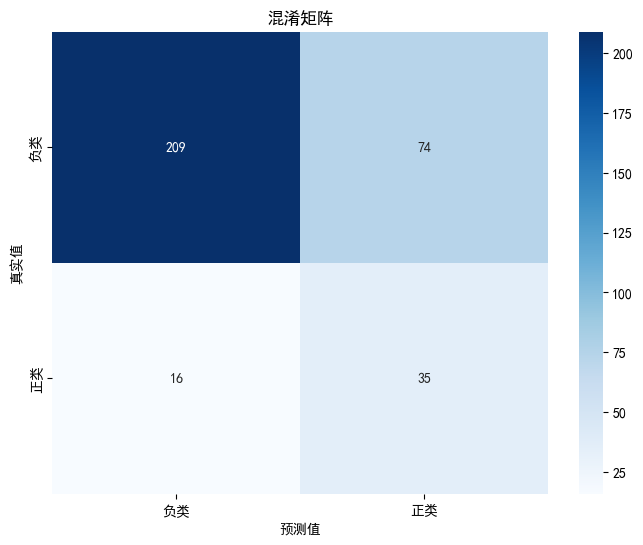

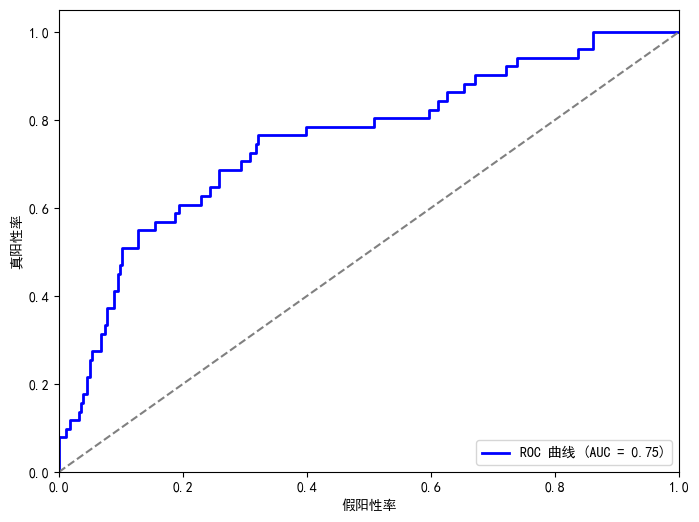

In [71]:
plt.rcParams['font.family'] = 'SimHei'
# 生成混淆矩阵
cm = confusion_matrix(y_test, y_pred)

# 绘制混淆矩阵的热力图
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["负类", "正类"], yticklabels=["负类", "正类"])
plt.xlabel('预测值')
plt.ylabel('真实值')
plt.title('混淆矩阵')
plt.show()

# 计算并绘制 ROC 曲线
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC 曲线 (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('假阳性率')
plt.ylabel('真阳性率')

plt.legend(loc="lower right")
plt.show()

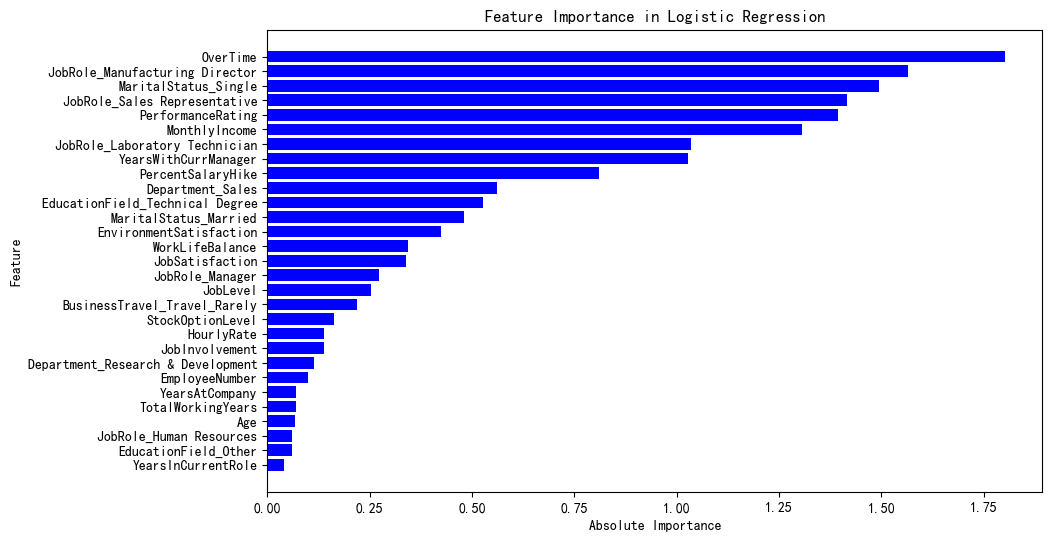

In [73]:
model = grid_search_logistic.best_estimator_
feature_names = list(X_train.columns)  # 替换成实际的特征名称
feature_importance = model.coef_.flatten()

# 创建特征和重要性数据框
df_feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': np.abs(feature_importance)})

# 按重要性排序
df_feature_importance.sort_values(by='Importance', ascending=False, inplace=True)

# 绘制特征重要性条形图
plt.figure(figsize=(10, 6))
plt.barh(df_feature_importance['Feature'], df_feature_importance['Importance'], color='blue')
plt.xlabel('Absolute Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Logistic Regression')
plt.gca().invert_yaxis()
plt.show()

In [75]:
# 参数网格
param_grid = {
    'criterion': ['gini', 'entropy'],  # 判断标准
    'max_depth': np.arange(2, 10),  # 树的最大深度
    'min_samples_split': np.arange(2, 10),  # 内部节点再划分所需最小样本数
    'min_samples_leaf': np.arange(1, 10)  # 叶子节点最少样本数
}

# 初始化 KFold
kf = KFold(n_splits=5, random_state=42, shuffle=True)

# 初始化 DecisionTreeClassifier
model = DecisionTreeClassifier(class_weight='balanced')

# 初始化 GridSearchCV
grid_search_decisiontree = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring={
        'accuracy': make_scorer(accuracy_score),
        'precision': make_scorer(precision_score),
        'recall': make_scorer(recall_score),
        'f1': make_scorer(f1_score)
    },
    refit='f1',  # 选择以 F1 分数为标准来重新训练最优模型
    cv=kf,
    verbose=1,  # 显示搜索过程中的详细信息
    n_jobs=-1,  # 使用所有可用的CPU核
    return_train_score=True  # 返回训练集的得分
)


# 拟合 GridSearchCV
grid_search_decisiontree.fit(X_train, y_train)

# 使用最佳模型进行预测
y_pred = grid_search_decisiontree.predict(X_test)
y_pred_train = grid_search_logistic.predict(X_train)
y_proba = grid_search_decisiontree.predict_proba(X_test)[:, 1]



# 获取最佳参数
best_params = grid_search_decisiontree.best_params_

# 打印最佳参数
print("最佳参数:", best_params)

# 获取最佳模型的性能指标
best_score = grid_search_decisiontree.best_score_
print("最佳 F1 分数:", best_score)
print(' 测试集F1 分数',f1_score(y_test,y_pred))


# 可选：查看整个网格搜索的结果
results_tree = pd.DataFrame(grid_search_decisiontree.cv_results_)
# print(results[['param_criterion', 'param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf', 'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1', 'mean_train_accuracy', 'mean_train_precision', 'mean_train_recall', 'mean_train_f1']])


Fitting 5 folds for each of 1152 candidates, totalling 5760 fits
最佳参数: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 6, 'min_samples_split': 6}
最佳 F1 分数: 0.5383652021602685
 测试集F1 分数 0.3592814371257485


In [77]:
best_params = grid_search_decisiontree.best_params_

# 打印最佳参数
print("最佳参数:", best_params)
print()
# 评估训练集性能
train_accuracy = accuracy_score(y_train, y_pred_train)
train_precision = precision_score(y_train, y_pred_train)
train_recall = recall_score(y_train, y_pred_train)
train_f1 = f1_score(y_train, y_pred_train)





# 评估测试集性能
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)





# 打印结果
print("训练集准确率:", train_accuracy)
print("训练集精确率:", train_precision)
print("训练集召回率:", mean_train_recall)
print("训练集 F1 分数:", mean_train_f1)
print()
print("测试集准确率:", test_accuracy)
print("测试集精确率:", test_precision)
print("测试集召回率:", test_recall)
print("测试集 F1 分数:", test_f1)


# 可选：查看整个网格搜索的结果
results_logistic = pd.DataFrame(grid_search_logistic.cv_results_)

最佳参数: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 6, 'min_samples_split': 6}

训练集准确率: 0.7853470437017995
训练集精确率: 0.42323651452282157
训练集召回率: 0.7677878923857488
训练集 F1 分数: 0.5148769789614815

测试集准确率: 0.6796407185628742
测试集精确率: 0.25862068965517243
测试集召回率: 0.5882352941176471
测试集 F1 分数: 0.3592814371257485


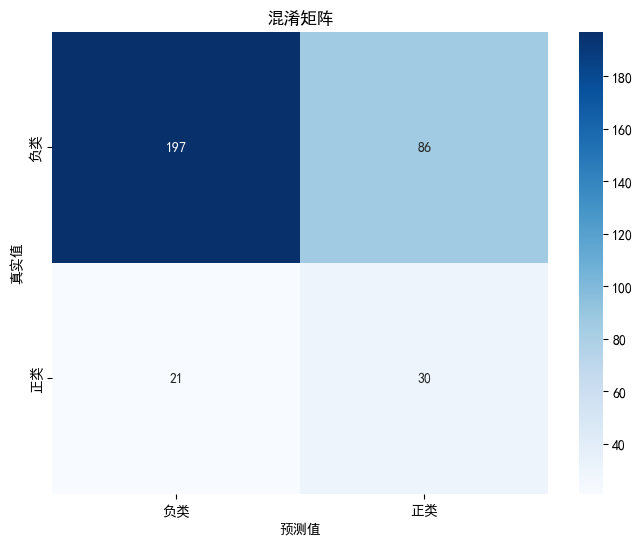

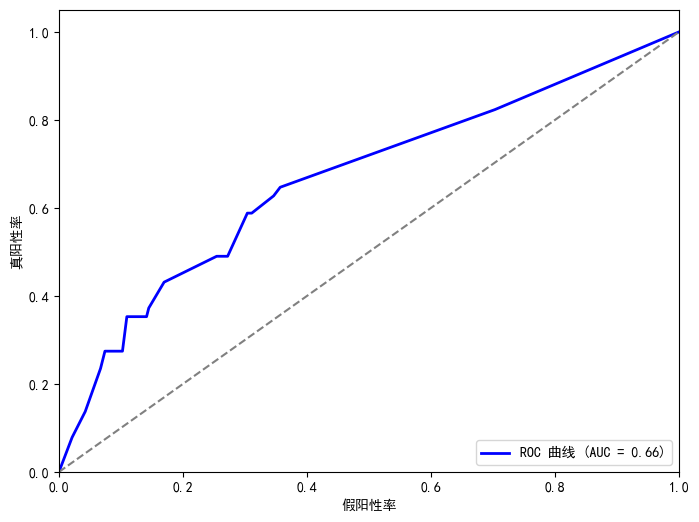

In [78]:
cm = confusion_matrix(y_test, y_pred)
# 绘制混淆矩阵的热力图
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["负类", "正类"], yticklabels=["负类", "正类"])
plt.xlabel('预测值')
plt.ylabel('真实值')
plt.title('混淆矩阵')
plt.show()

# 计算并绘制 ROC 曲线
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC 曲线 (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('假阳性率')
plt.ylabel('真阳性率')

plt.legend(loc="lower right")
plt.show()

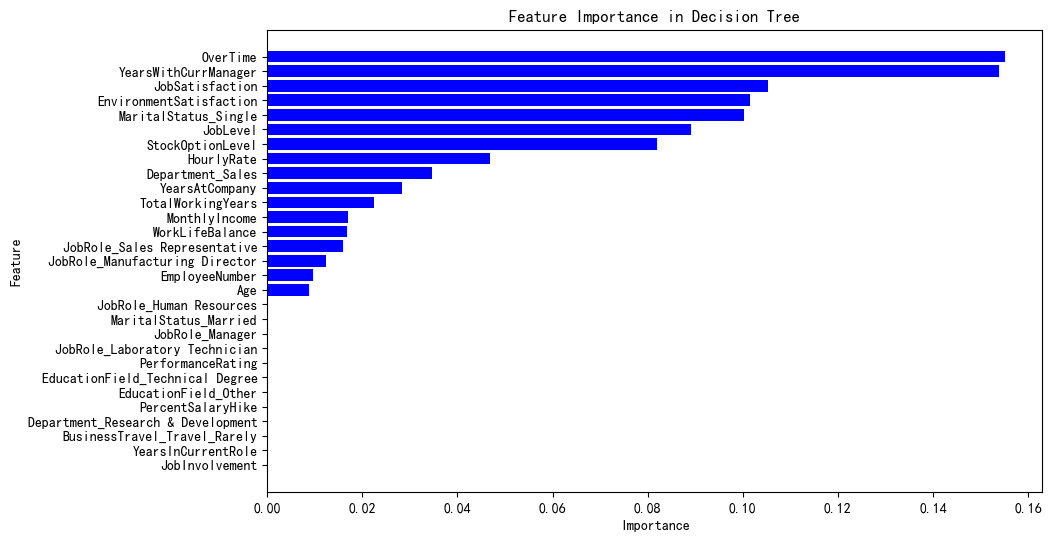

In [79]:
# 假设您的训练集特征名称在这里定义（如用 pandas DataFrame）
feature_names =list(X_train.columns)  # 替换成实际的特征名称

# 获取最佳模型的特征重要性
best_model = grid_search_decisiontree.best_estimator_
feature_importance = best_model.feature_importances_

# 将特征名称和重要性组合成数据框并排序

importance_df_decisiontree = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})
importance_df_decisiontree.sort_values(by='Importance', ascending=False, inplace=True)

# 绘制特征重要性条形图

plt.figure(figsize=(10, 6))
plt.barh(importance_df_decisiontree['Feature'], importance_df_decisiontree['Importance'], color='blue')
plt.xlabel('Importance')
plt.ylabel('Feature')
# plt.title('Feature Importance in Decision Tree')
plt.gca().invert_yaxis()
plt.show()


In [81]:
# 参数网格
param_grid = {
    'max_depth': [2,3, 4, 5, 6],  # 树的最大深度
    'learning_rate': [0.01, 0.1, 0.2],  # 学习率
    'n_estimators': [100, 200, 300],  # 树的数量
    'subsample': [0.7, 0.8, 0.9],  # 训练每棵树时用到的样本比例
    'colsample_bytree': [0.7, 0.8, 0.9],  # 构造每棵树时的列采样比例
    
}

# 初始化 KFold
kf = KFold(n_splits=5, random_state=42, shuffle=True)

# 初始化 XGBClassifier
model = XGBClassifier(use_label_encoder=False, eval_metric='auc' )

# 初始化 GridSearchCV
grid_search_xg = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring={
        'accuracy': make_scorer(accuracy_score),
        'precision': make_scorer(precision_score),
        'recall': make_scorer(recall_score),
        'f1': make_scorer(f1_score),
        'auc': 'roc_auc'
    },
    refit='f1',  # 选择以 F1 分数为标准来重新训练最优模型
    cv=kf,
    verbose=1,  # 显示搜索过程中的详细信息
    n_jobs=-1,  # 使用所有可用的CPU核
    return_train_score=True  # 返回训练集的得分
)

# 拟合 GridSearchCV
grid_search_xg.fit(X_train, y_train)

# 使用最佳模型进行预测
y_pred = grid_search_xg.predict(X_test)
y_pred_train = grid_search_logistic.predict(X_train)
y_proba = grid_search_xg.predict_proba(X_test)[:, 1]



# 获取最佳参数
best_params = grid_search_xg.best_params_

# 打印最佳参数
print("最佳参数:", best_params)

# 获取最佳模型的性能指标
best_score = grid_search_xg.best_score_
print("最佳 F1 分数:", best_score)
print('测试集F1 分数',f1_score(y_test,y_pred))

# 可选：查看整个网格搜索的结果
results_xg = pd.DataFrame(grid_search_xg.cv_results_)

Fitting 5 folds for each of 405 candidates, totalling 2025 fits
最佳参数: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200, 'subsample': 0.8}
最佳 F1 分数: 0.5654281558784281
测试集F1 分数 0.391304347826087


In [82]:
best_params = grid_search_xg.best_params_

# 打印最佳参数
print("最佳参数:", best_params)
print()
# 评估训练集性能
train_accuracy = accuracy_score(y_train, y_pred_train)
train_precision = precision_score(y_train, y_pred_train)
train_recall = recall_score(y_train, y_pred_train)
train_f1 = f1_score(y_train, y_pred_train)





# 评估测试集性能
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)





# 打印结果
print("训练集准确率:", train_accuracy)
print("训练集精确率:", train_precision)
print("训练集召回率:", mean_train_recall)
print("训练集 F1 分数:", mean_train_f1)
print()
print("测试集准确率:", test_accuracy)
print("测试集精确率:", test_precision)
print("测试集召回率:", test_recall)
print("测试集 F1 分数:", test_f1)


# 可选：查看整个网格搜索的结果
results_logistic = pd.DataFrame(grid_search_logistic.cv_results_)

最佳参数: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200, 'subsample': 0.8}

训练集准确率: 0.7853470437017995
训练集精确率: 0.42323651452282157
训练集召回率: 0.7677878923857488
训练集 F1 分数: 0.5148769789614815

测试集准确率: 0.8323353293413174
测试集精确率: 0.43902439024390244
测试集召回率: 0.35294117647058826
测试集 F1 分数: 0.391304347826087


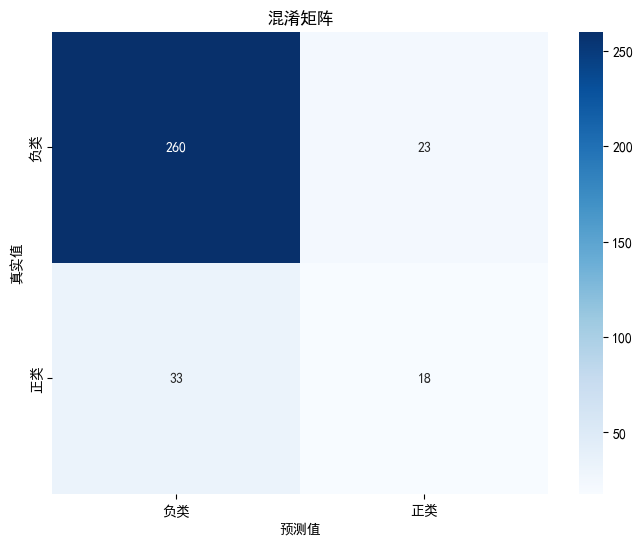

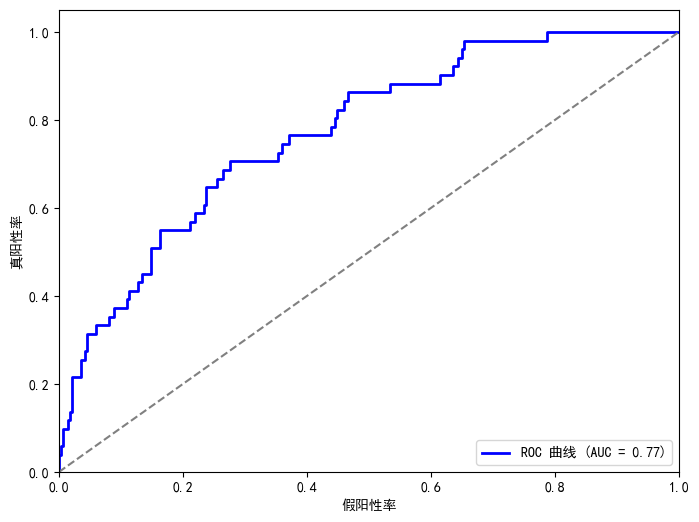

In [83]:
# print(results[['param_criterion', 'param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf', 'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1', 'mean_train_accuracy', 'mean_train_precision', 'mean_train_recall', 'mean_train_f1']])
cm = confusion_matrix(y_test, y_pred)

# 绘制混淆矩阵的热力图
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["负类", "正类"], yticklabels=["负类", "正类"])
plt.xlabel('预测值')
plt.ylabel('真实值')
plt.title('混淆矩阵')
plt.show()

# 计算并绘制 ROC 曲线
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC 曲线 (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('假阳性率')
plt.ylabel('真阳性率')

plt.legend(loc="lower right")
plt.show()

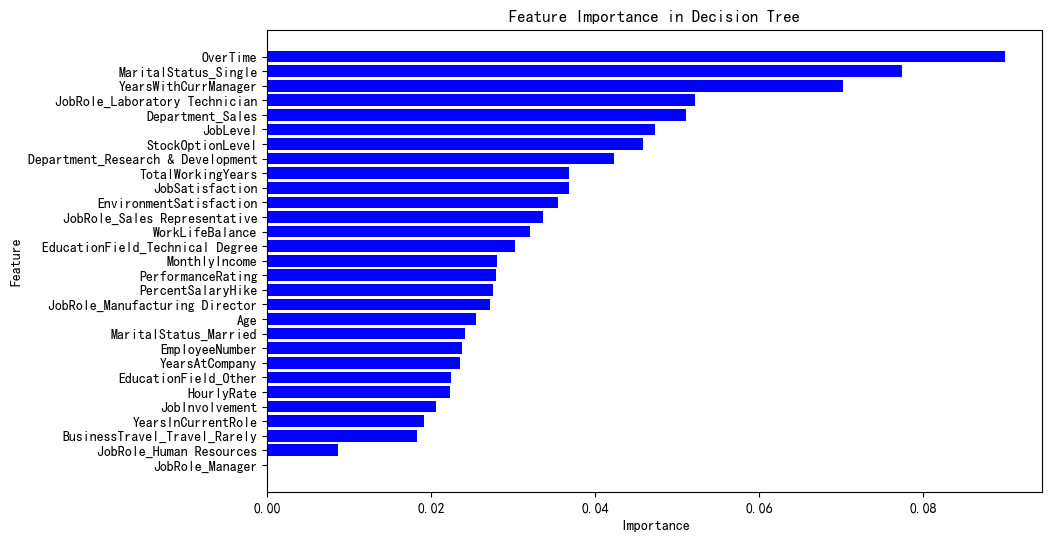

In [88]:
# 假设您的训练集特征名称在这里定义（如用 pandas DataFrame）
feature_names =list(X_train.columns)  # 替换成实际的特征名称

# 获取最佳模型的特征重要性
best_model = grid_search_xg.best_estimator_
feature_importance = best_model.feature_importances_

# 将特征名称和重要性组合成数据框并排序

importance_df_xg = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})
importance_df_xg.sort_values(by='Importance', ascending=False, inplace=True)

# 绘制特征重要性条形图

plt.figure(figsize=(10, 6))
plt.barh(importance_df_xg['Feature'], importance_df_xg['Importance'], color='blue')
plt.xlabel('Importance')
plt.ylabel('Feature')
# plt.title('Feature Importance in Decision Tree')
plt.gca().invert_yaxis()
plt.show()


In [84]:
final_model = XGBClassifier(colsample_bytree=0.8, learning_rate = 0.1, max_depth= 3, n_estimators=300, subsample= 0.7)
final_model.fit(X,y)

predict  = final_model.predict(df_hot_test)

,Attrition
0,0
1,0
2,0
3,0
4,1
...,...
289,0
290,0
291,1
292,0


In [106]:
len(predict)
test_ = pd.read_csv('test.csv')
pd.concat([test_,pd.DataFrame(predict,columns=['Attrition'])],axis=1).to_csv('test_.csv',index=False)

In [106]:
df_feature_importance

,Feature,Importance
20,BusinessTravel_Travel_Frequently,1.686093
8,OverTime,1.675050
27,JobRole_Laboratory Technician,1.108662
31,MaritalStatus_Single,1.085307
21,BusinessTravel_Travel_Rarely,1.017394
19,YearsWithCurrManager,1.004098
30,JobRole_Sales Representative,0.978675
29,JobRole_Research Director,0.956616
10,PerformanceRating,0.846655
24,EducationField_Marketing,0.796318


In [89]:
pd.concat([df_feature_importance.reset_index(drop=True), importance_df_decisiontree.reset_index(drop=True),importance_df_xg.reset_index(drop=True)],axis=1)

,Feature,Importance,Feature,Importance,Feature,Importance
0,OverTime,1.802914,OverTime,0.155236,OverTime,0.090035
1,JobRole_Manufacturing Director,1.565554,YearsWithCurrManager,0.153985,MaritalStatus_Single,0.077411
2,MaritalStatus_Single,1.493481,JobSatisfaction,0.105358,YearsWithCurrManager,0.070193
3,JobRole_Sales Representative,1.416896,EnvironmentSatisfaction,0.101470,JobRole_Laboratory Technician,0.052122
4,PerformanceRating,1.393138,MaritalStatus_Single,0.100296,Department_Sales,0.051061
5,MonthlyIncome,1.304932,JobLevel,0.089055,JobLevel,0.047332
6,JobRole_Laboratory Technician,1.036089,StockOptionLevel,0.081944,StockOptionLevel,0.045833
7,YearsWithCurrManager,1.028333,HourlyRate,0.046936,Department_Research & Development,0.042251
8,PercentSalaryHike,0.811344,Department_Sales,0.034734,TotalWorkingYears,0.036827
9,Department_Sales,0.560701,YearsAtCompany,0.028359,JobSatisfaction,0.036746


In [90]:
data_train.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')